In [1]:
import pandas as pd
from seaborn import heatmap
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Testing data/combined_sensor_data.csv')

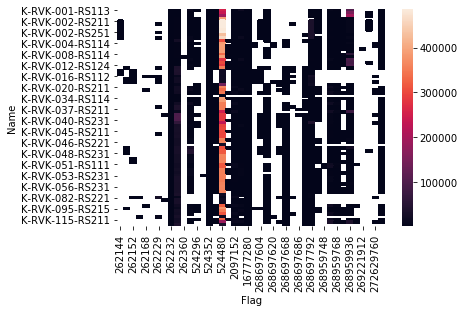

In [3]:
flag_name_df = df.groupby(['Name','Flag']).count()
flag_df = pd.pivot_table(flag_name_df,values='Val',
               index=flag_name_df.index.get_level_values(0),
               columns=flag_name_df.index.get_level_values(1))
heatmap(flag_df)

In [4]:
df = df.loc[df.CType == 4]
df = df.loc[df.Flag == 524480]

In [5]:
df = df.loc[:,['Name','CTime','Val']]

In [6]:
df.to_csv('./Testing data/combined_sensor_data_average_ok_values.csv')

# Questions


1. Is is fair to assume that the data from most sensors with a good quality of data is somewhat accurately described by the model?
    - The model is the 3-way PARAFAC model, i.e. we assume there are daily profiles and weekly profiles and they are latent in the data in a way that the PARAFAC model can retrieve them and then reconstruct the data to show how much usage can be assigned to each profile.
    - The sensors with 'good quality' of data are hand selected based on consistency, time without connection and ???
    

In [7]:
df.Name.unique()

array(['K-RVK-001-RS113', 'K-RVK-001-RS114', 'K-RVK-001-RS211',
       'K-RVK-001-RS212', 'K-RVK-002-RS211', 'K-RVK-002-RS221',
       'K-RVK-002-RS231', 'K-RVK-002-RS241', 'K-RVK-002-RS251',
       'K-RVK-002-RS261', 'K-RVK-002-RS281', 'K-RVK-003-RS211',
       'K-RVK-004-RS114', 'K-RVK-004-RS124', 'K-RVK-006-RS111',
       'K-RVK-007-RS111', 'K-RVK-008-RS114', 'K-RVK-009-RS111',
       'K-RVK-011-RS111', 'K-RVK-012-RS114', 'K-RVK-012-RS124',
       'K-RVK-013-RS211', 'K-RVK-014-RS111', 'K-RVK-015-RS115',
       'K-RVK-016-RS112', 'K-RVK-017-RS113', 'K-RVK-018-RS114',
       'K-RVK-019-RS221', 'K-RVK-020-RS211', 'K-RVK-022-RS211',
       'K-RVK-023-RS211', 'K-RVK-030-RS901', 'K-RVK-034-RS114',
       'K-RVK-034-RS215', 'K-RVK-035-RS211', 'K-RVK-036-RS211',
       'K-RVK-037-RS211', 'K-RVK-038-RS211', 'K-RVK-040-RS211',
       'K-RVK-040-RS221', 'K-RVK-040-RS231', 'K-RVK-040-RS241',
       'K-RVK-043-RS211', 'K-RVK-044-RS241', 'K-RVK-045-RS211',
       'K-RVK-045-RS221', 'K-RVK-045-RS2

In [55]:
sensors_of_interst = ['K-RVK-003-RS211',
                      'K-RVK-013-RS211',
                      'K-RVK-020-RS211',
                      'K-RVK-019-RS221',
                      'K-RVK-035-RS211',
                      'K-RVK-036-RS211',
                      'K-RVK-038-RS211',
                      'K-RVK-040-RS211',
                      'K-RVK-040-RS221',
                      'K-RVK-040-RS241',
                      'K-RVK-044-RS241',
                      'K-RVK-045-RS211',
                      'K-RVK-045-RS221',
                      'K-RVK-046-RS221',
                      'K-RVK-049-RS221',
                      'K-RVK-053-RS211',
                      'K-RVK-055-RS231']
    

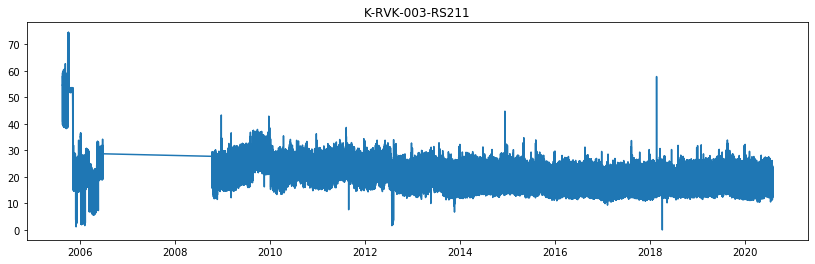

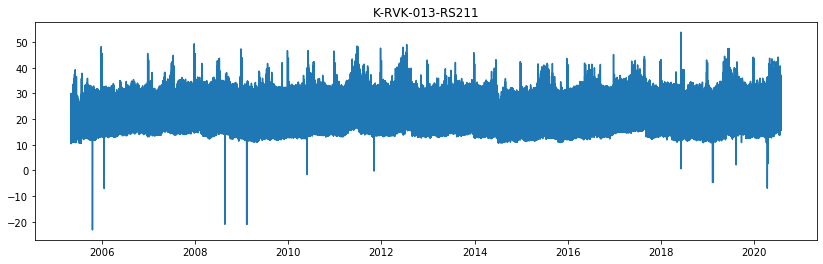

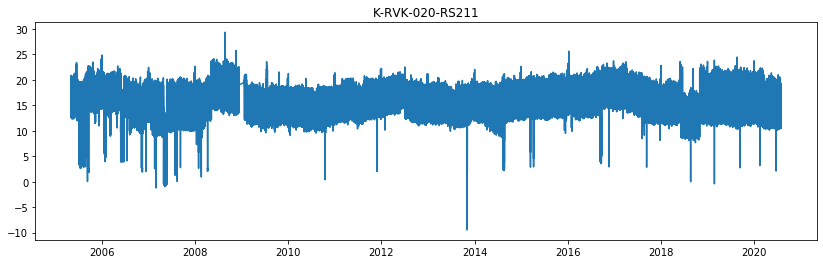

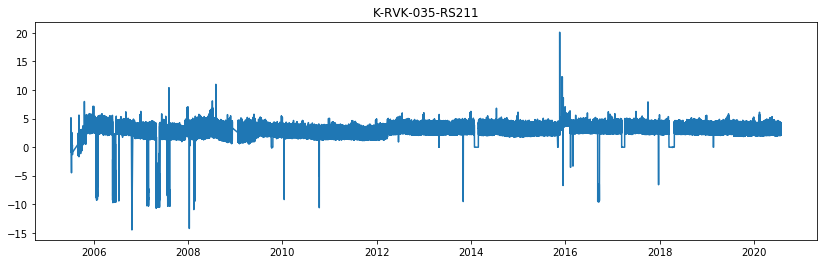

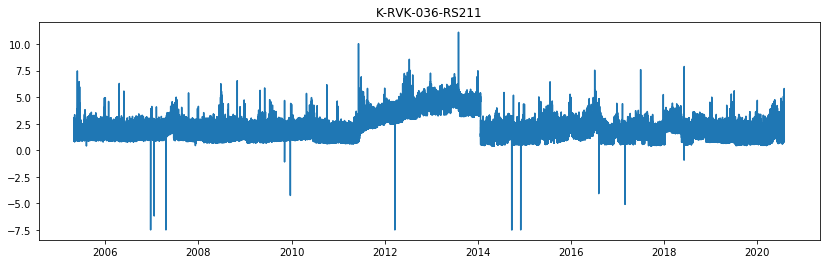

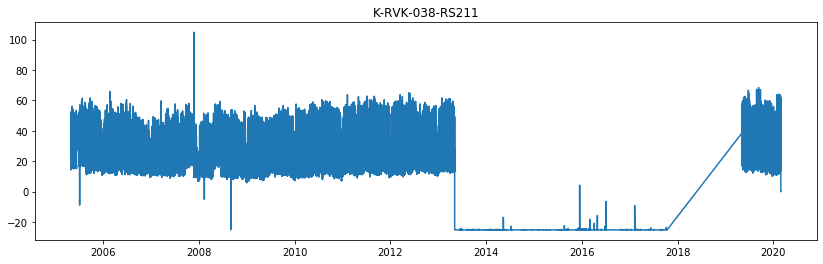

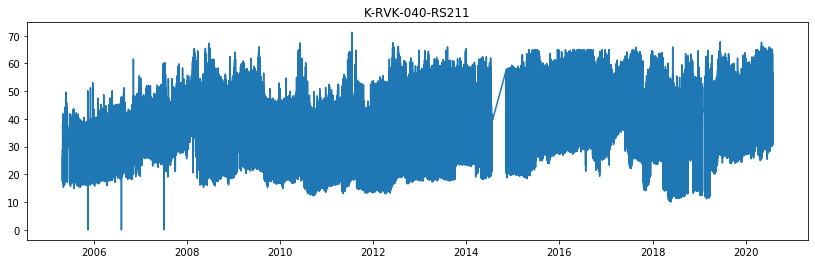

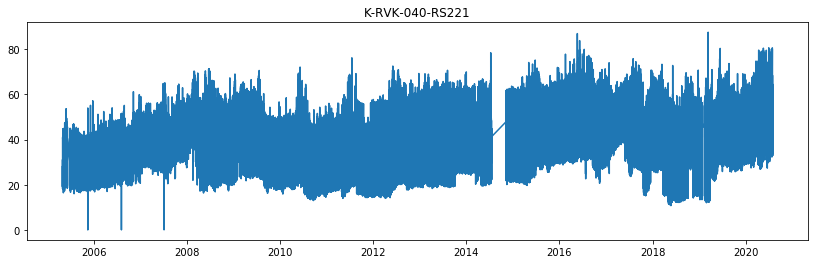

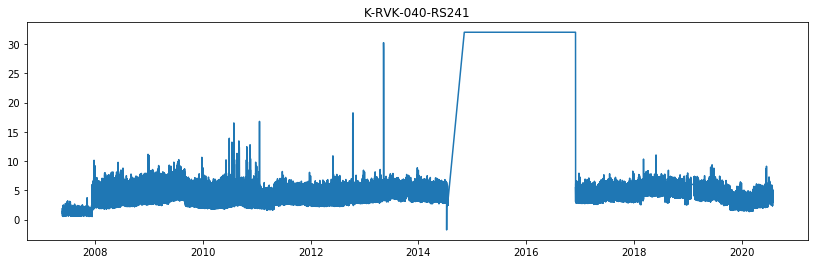

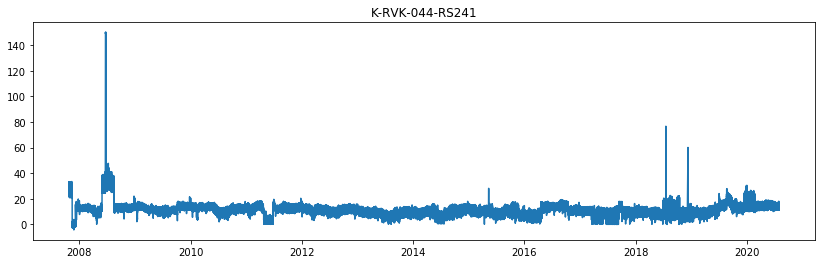

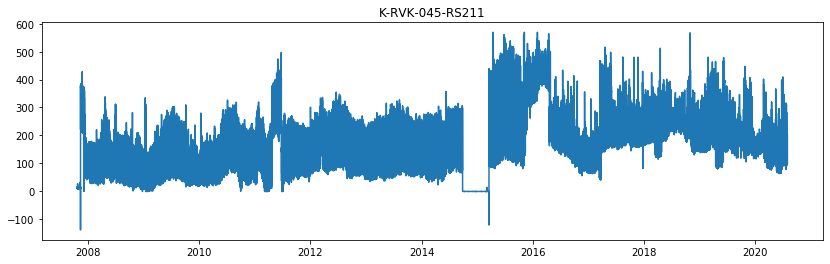

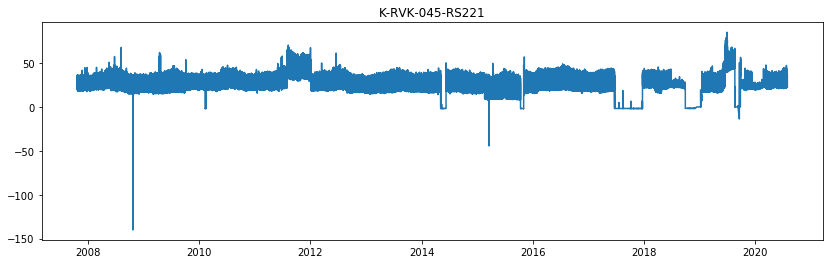

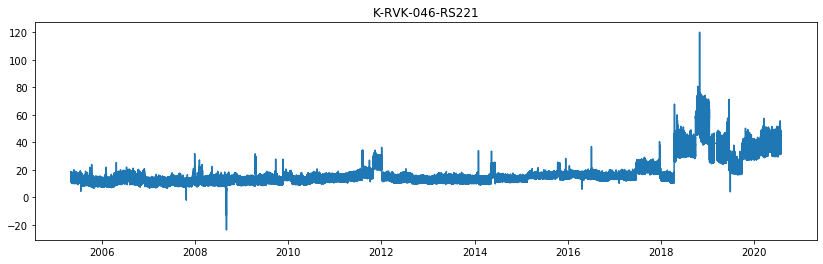

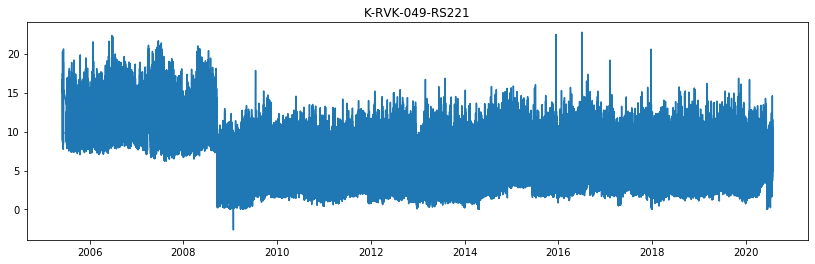

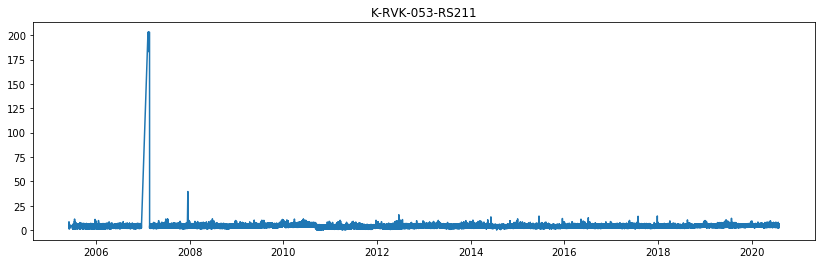

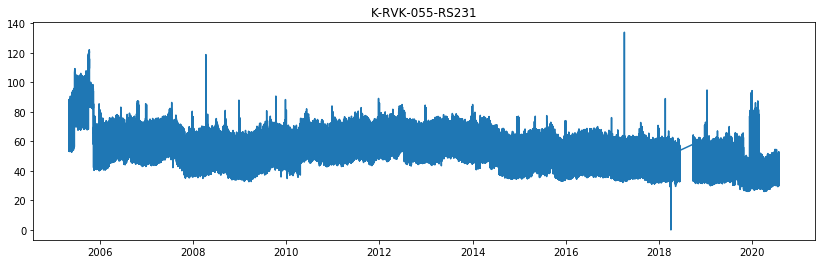

In [9]:
for sensor in df.Name.unique():
    if sensor not in sensors_of_interst:
        continue
    subset = df.loc[df.Name == sensor]
    subset.index = pd.DatetimeIndex(subset.CTime)
    plt.figure(figsize=(14,4))
    plt.plot(subset.sort_index().Val)
    plt.title(sensor)
    plt.show()

# Minor pre-processing

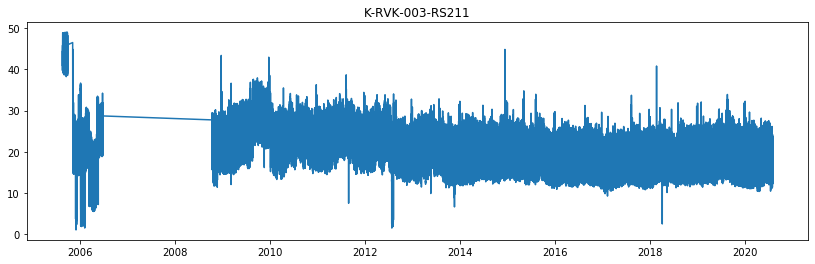

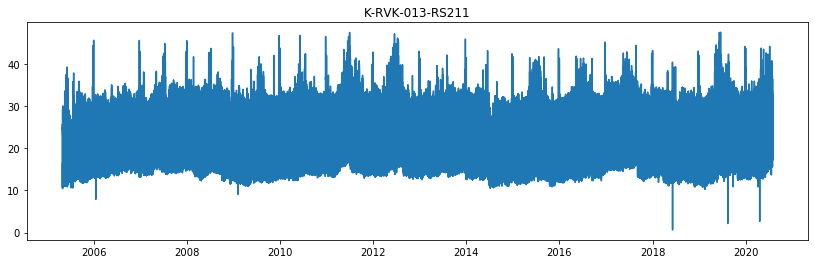

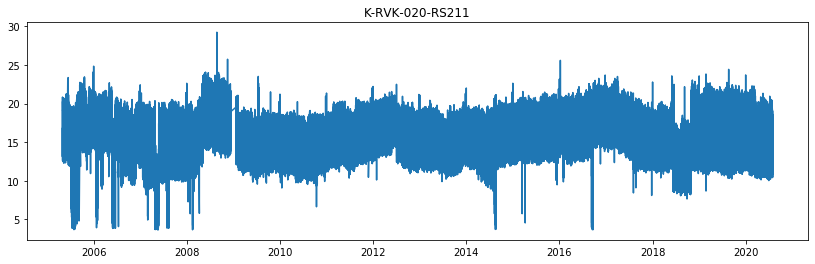

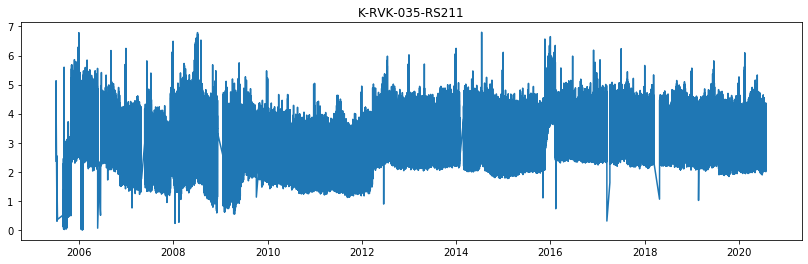

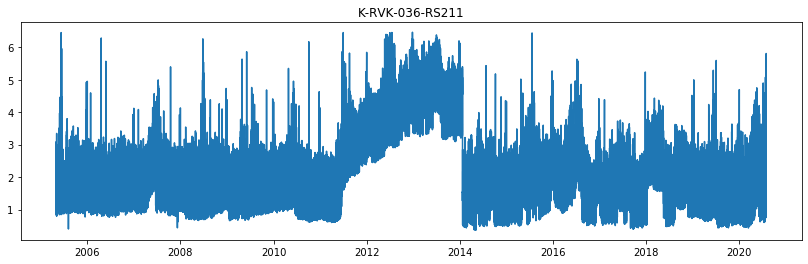

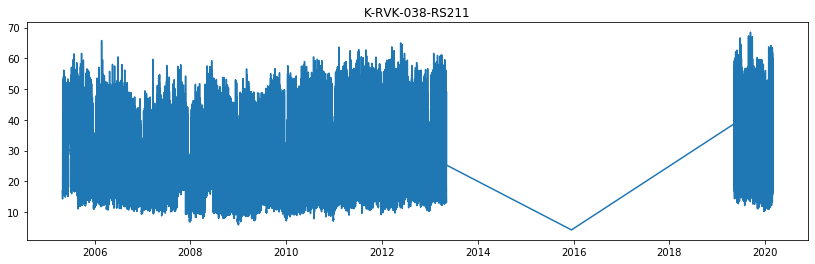

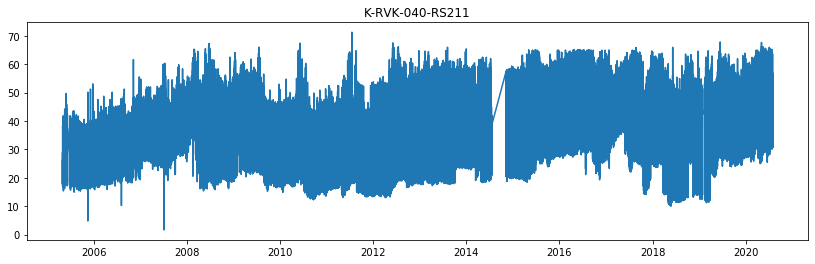

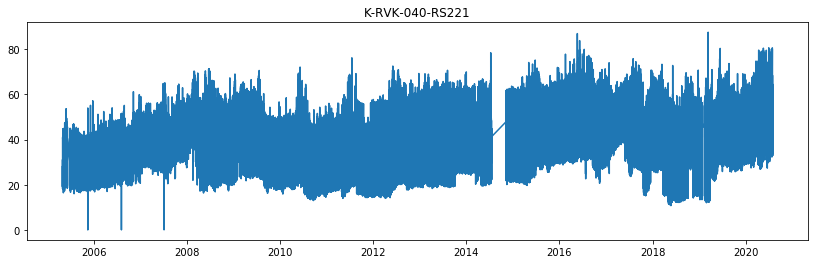

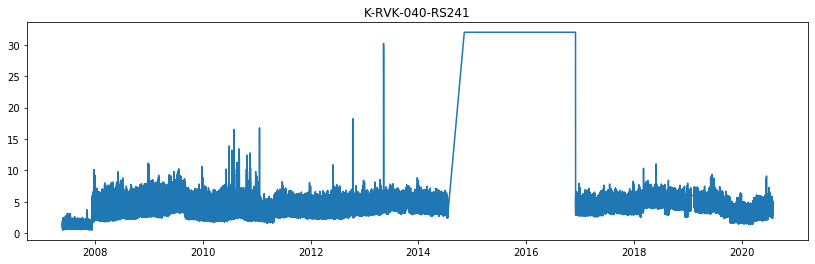

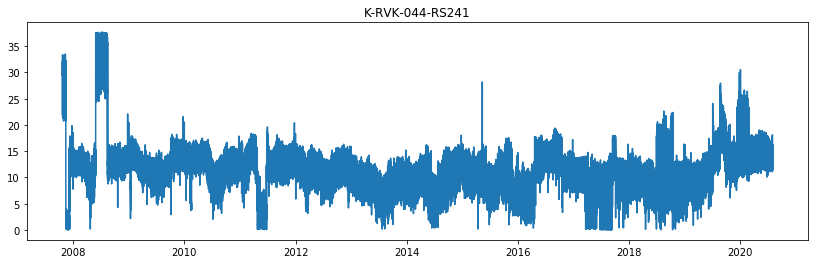

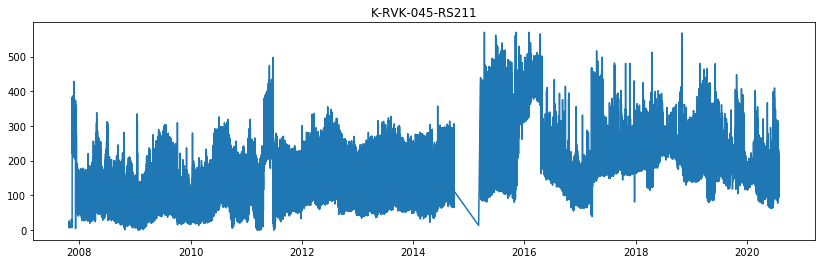

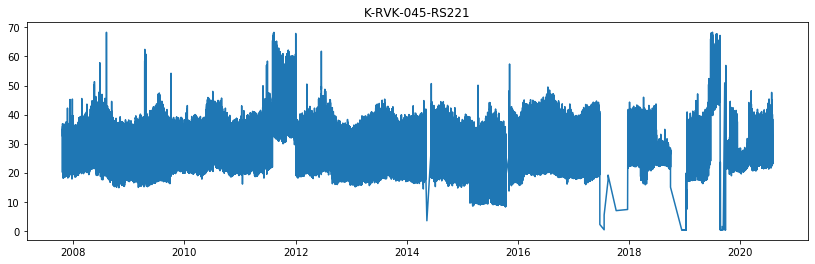

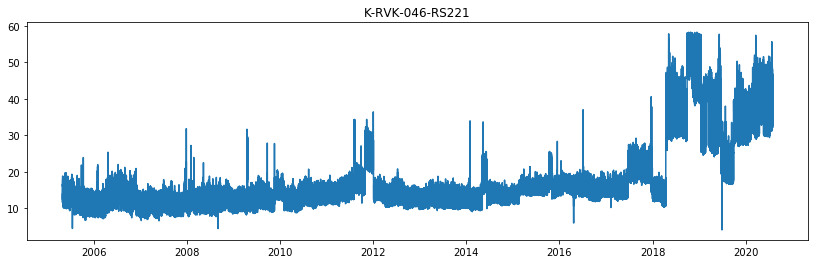

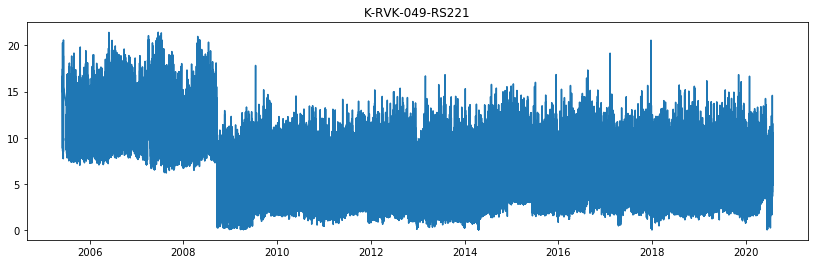

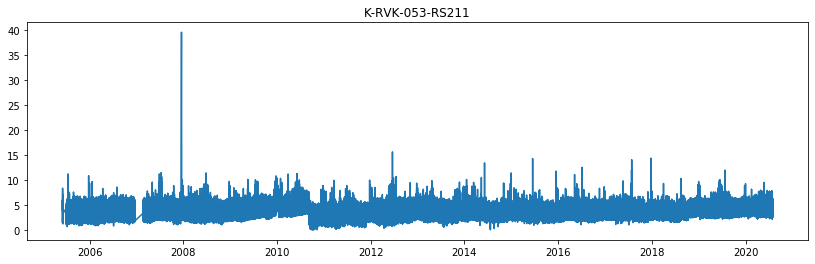

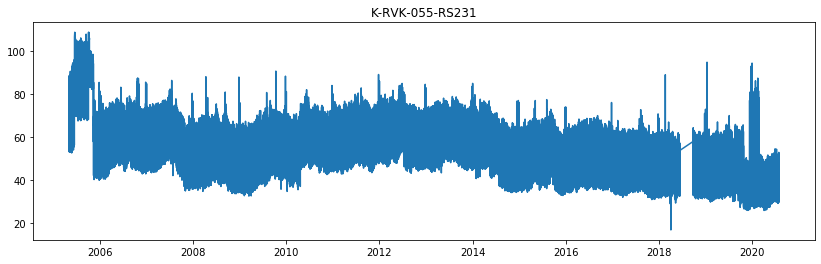

In [10]:
for sensor in df.Name.unique():
    if sensor not in sensors_of_interst:
        continue
        
    subset = df.loc[df.Name == sensor]
    subset.index = pd.DatetimeIndex(subset.CTime)
    
    subset = subset.loc[subset.Val > 0]
    
    std = subset.Val.std()
    mean = subset.Val.mean()
    subset = subset.loc[(subset.Val < mean+4*std) &
                        (subset.Val > mean-4*std)]
    
    plt.figure(figsize=(14,4))
    plt.plot(subset.sort_index().Val)
    plt.title(sensor)
    plt.show()

In [24]:
df.CTime

3           2020-06-04 11:00:00.000
6           2020-06-04 12:00:00.000
9           2020-06-04 13:00:00.000
12          2020-06-04 14:00:00.000
15          2020-06-04 15:00:00.000
                     ...           
27176471    2019-01-21 07:00:00.000
27176474    2019-01-21 08:00:00.000
27176477    2019-01-21 09:00:00.000
27176480    2019-01-16 18:00:00.000
27176482    2019-01-16 19:00:00.000
Name: CTime, Length: 9079253, dtype: object

In [26]:
pd.DatetimeIndex()

KeyboardInterrupt: 

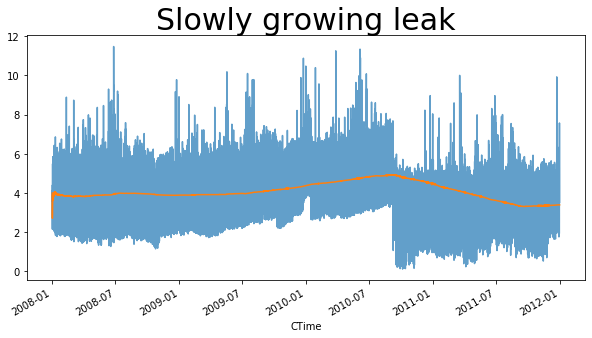

In [56]:
import datetime as dt
tmp_for_plot = df.loc[df.Name == 'K-RVK-053-RS211']
tmp_for_plot.index = pd.DatetimeIndex(tmp_for_plot.CTime)
tmp_for_plot = tmp_for_plot[tmp_for_plot.Val < 20]

plt.figure(figsize=(10,5))
tmp_for_plot.Val.loc[dt.date(2008,1,2):dt.date(2012,1,1)].plot(alpha=0.7)
tmp_for_plot.Val.loc[dt.date(2008,1,2):dt.date(2012,1,1)].rolling(168*52,min_periods=0).mean().plot()
plt.title('Slowly growing leak',fontsize=30)
plt.show()

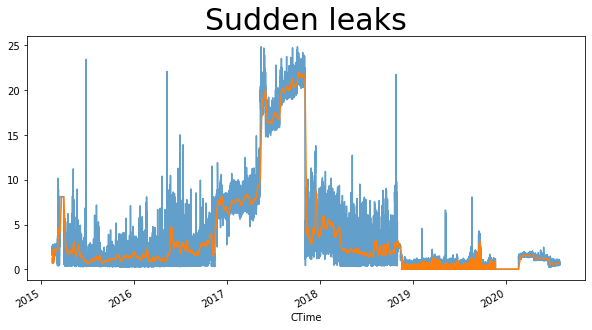

In [104]:
import datetime as dt
tmp_for_plot = df.loc[df.Name == 'K-RVK-019-RS221'].sort_index()
tmp_for_plot.index = pd.DatetimeIndex(tmp_for_plot.CTime)
tmp_for_plot = tmp_for_plot[tmp_for_plot.Val < 25]

plt.figure(figsize=(10,5))
tmp_for_plot.Val.plot(alpha=0.7)
tmp_for_plot.Val.rolling(168*1,min_periods=0).mean().plot()
plt.title('Sudden leaks',fontsize=30)
plt.show()

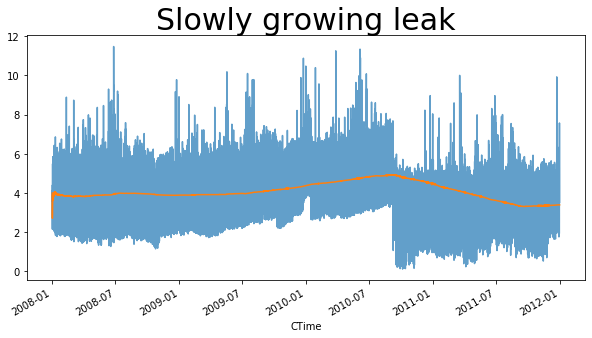

In [ ]:
tmp_for_plot.Val.plot()

# Decomposing and reconstructing data

In [11]:
from tensorly.decomposition.candecomp_parafac import *
from tensorly.kruskal_tensor import kruskal_normalise
from tensorly.kruskal_tensor import khatri_rao
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
clean_sensor_dict = {}
problem_sensor_dict = {}
for sensor in sensors_of_interst:    
    subset = df.loc[df.Name == sensor].dropna()
    subset.index = pd.DatetimeIndex(subset.CTime)
    subset = subset.loc[subset.Val > 0]
    std = subset.Val.std()
    mean = subset.Val.mean()
    subset = subset.loc[(subset.Val < mean+4*std) &
                        (subset.Val > mean-4*std)]
    print(len(subset))
    print(mean,std)
    try:
        x = subset.Val
        x = x.resample('1h').mean()
        x = x.fillna(method='ffill',limit = 5)
        weekhour_index = x.index.weekday * 24 + x.index.hour
        first_0 = np.argwhere(weekhour_index == 0)[0,0]
        last_0 = np.argwhere(weekhour_index == 0)[-1,0]
        x = x.iloc[first_0:last_0]
        X = x.values.reshape((-1,7,24))
        
        clean_sensor_dict[sensor] = X
    except:
        print(sensor)
        print(subset)
        problem_sensor_dict[sensor] = df.loc[df.Name == sensor].dropna()

108296
22.390460393798705 6.6609044549434415
131022
23.266763256662085 6.085861905812877
128343
16.441804238621568 3.202135136491383
120952
3.2479307383793583 0.8880715040662764
131170
2.184448678185249 1.0698930850756398
75451
25.66949014093596 12.502470854025812
127828
40.238109641265815 11.105024619721513
128102
43.24081001547541 11.991231357556588
110865
9.041908227476924 10.229421444745705
109487
11.297186637963756 6.5918061393032135
105218
198.49459989237064 99.9083599973949
101599
30.44367835346392 9.477746099373348
128502
18.20587395062017 10.02136761654392
129831
6.558907778211521 3.720710181006447
127676
4.504864392070418 9.828946997725222
128799
57.65498895286049 12.784563079261495


In [13]:
cleaned_data = pd.DataFrame([clean_sensor_dict[key].ravel() for key in clean_sensor_dict]).T

In [14]:
cleaned_data.to_csv('cleand_data.csv')

In [15]:
key_list = [x for x in clean_sensor_dict]
tmp_X = clean_sensor_dict[key_list[0]]
complete_weeks = ~np.isnan(tmp_X).reshape(-1,24*7).any(axis=1)
X = tmp_X[complete_weeks,:]
flat_factors = [(1,0),(2,0)]

In [16]:
(core_tesnor,loadings),errors = non_negative_parafac_custom(X,
                                                            rank=3,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                    normalize_factors=False)
l_weeks,l_days,l_hours = loadings

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(errors)
plt.title('errors')
plt.xlabel('iterations')
plt.show()
###
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_days)
ax[2].plot(l_hours)
plt.suptitle('Profiles',fontsize=(30))
plt.show()
###
from tensorly.kruskal_tensor import khatri_rao
reconstructed = khatri_rao(loadings)
residuals = khatri_rao(loadings).sum(axis=1)-X.ravel()
print('mean squared error',np.mean(residuals**2))

In [ ]:
key_list = [x for x in clean_sensor_dict]

for key in key_list:
    tmp_X = clean_sensor_dict[key]
    complete_weeks = ~np.isnan(tmp_X).reshape(-1,24*7).any(axis=1)
    X = tmp_X[complete_weeks,:]
    flat_factors = [(1,0),(2,0)]
    ####
    
    plt.figure(figsize=(16,5))
    plt.plot(X.ravel())
    plt.title(f'Original measurements {key}')
    plt.show()
    
    ####
    
    (core_tesnor,loadings),errors = non_negative_parafac_custom(X,
                                                            rank=3,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                    normalize_factors=False)
    l_weeks,l_days,l_hours = loadings
    
    ####
    
    
    plt.figure(figsize=(16,5))
    plt.plot(errors)
    plt.title(f'errors {key}')
    plt.xlabel('iterations')
    plt.show()
    
    ###
    new_weights,normalized_loadings = kruskal_normalise((np.array([1,1,1]),
                                                         loadings))
    
    l_weeks,l_days,l_hours = normalized_loadings
    f,ax = plt.subplots(1,3,figsize=(16,5))
    ax[0].plot(new_weights*l_weeks)
    ax[1].plot(l_days)
    ax[2].plot(l_hours)
    plt.suptitle(f'Profiles {key}',fontsize=(30))
    plt.show()
    
    ###
    
    reconstructed = khatri_rao(loadings)
    residuals = khatri_rao(loadings).sum(axis=1)-X.ravel()
    print('mean squared error',np.mean(residuals**2))
    print('abundance of each profile:',new_weights)

In [ ]:
key_list = [x for x in clean_sensor_dict]

for key in key_list:
    tmp_X = clean_sensor_dict[key]
    complete_weeks = ~np.isnan(tmp_X).reshape(-1,24*7).any(axis=1)
    X = tmp_X[complete_weeks,:]
    flat_factors = [(1,0),(2,0)]
    ####
    
    plt.figure(figsize=(16,5))
    plt.plot(X.ravel())
    plt.title(f'Original measurements {key}')
    plt.show()
    
    ####
    
    (core_tesnor,loadings),errors = non_negative_parafac_custom(X,
                                                            rank=4,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                    normalize_factors=False)
    l_weeks,l_days,l_hours = loadings
    
    ####
    
    
    plt.figure(figsize=(16,5))
    plt.plot(errors)
    plt.title(f'errors {key}')
    plt.xlabel('iterations')
    plt.show()
    
    ###
    new_weights,normalized_loadings = kruskal_normalise((np.array([1,1,1,1]),
                                                         loadings))
    
    l_weeks,l_days,l_hours = normalized_loadings
    f,ax = plt.subplots(1,3,figsize=(16,5))
    ax[0].plot(new_weights*l_weeks)
    ax[1].plot(l_days)
    ax[2].plot(l_hours)
    plt.suptitle(f'Profiles {key}',fontsize=(30))
    plt.show()
    
    ###
    
    reconstructed = khatri_rao(loadings)
    residuals = khatri_rao(loadings).sum(axis=1)-X.ravel()
    print('mean squared error',np.mean(residuals**2))
    print('abundance of each profile:',new_weights)

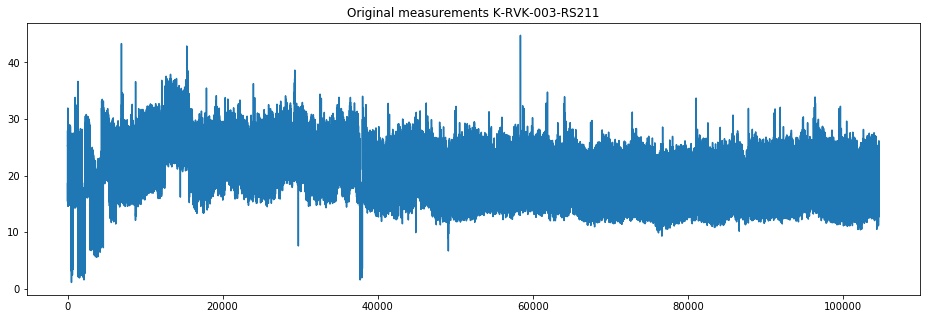

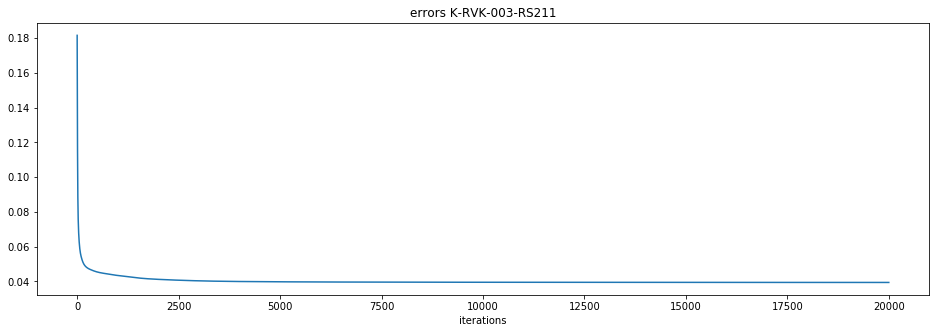

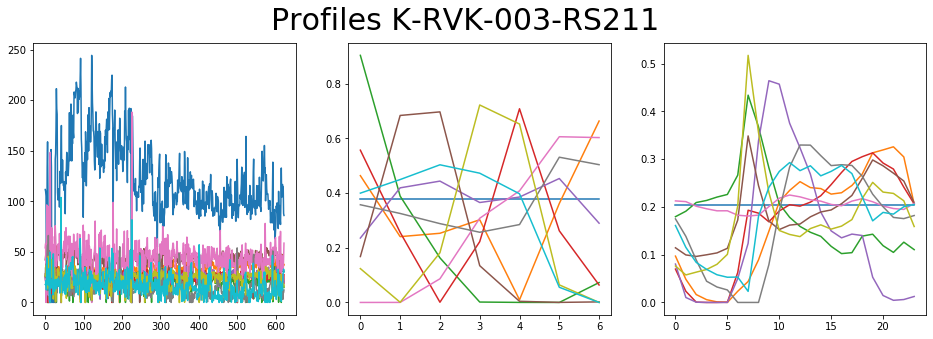

mean squared error 0.7846894417818441
abundance of each profile: [3174.94926124  811.6569855   518.46084667  595.13163842  620.42152897
 1050.72381491 1170.05934091  476.14734601  596.48021602  510.93810993]
Leak persentage: 33.33%


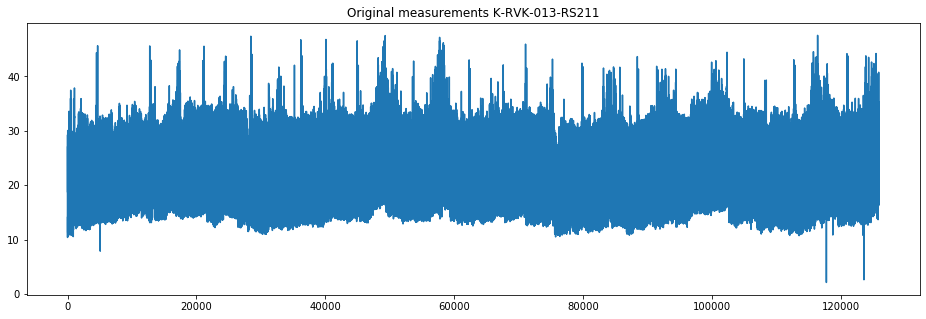

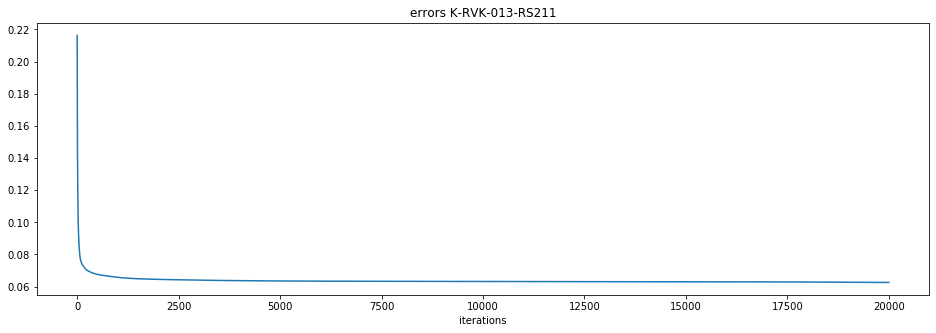

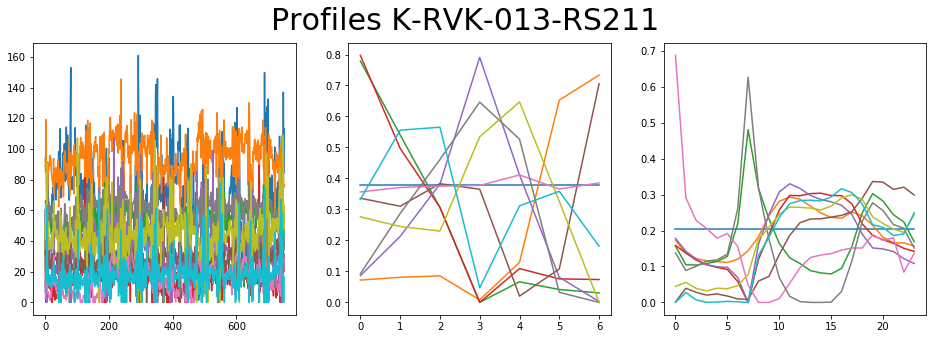

mean squared error 2.267285475784337
abundance of each profile: [1927.41893852 2576.02563164 1412.21713709  672.74640416 1110.02865117
  824.28683514  522.1002277  1543.78720283 1292.35228328  597.96792311]
Leak persentage: 15.45%


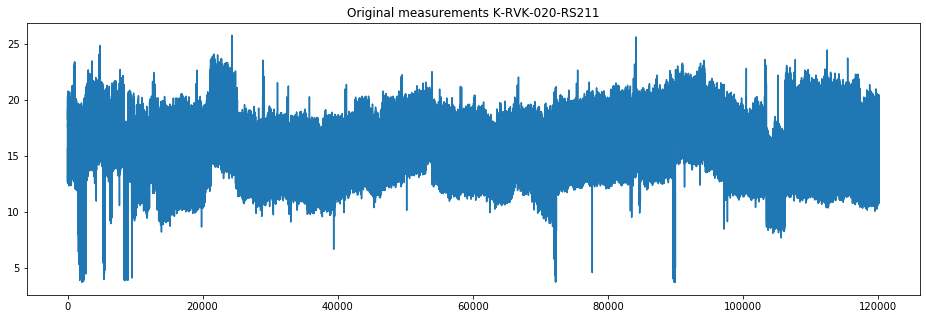

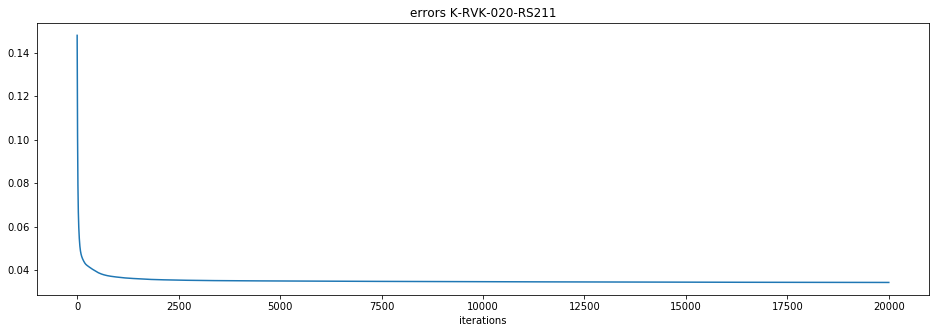

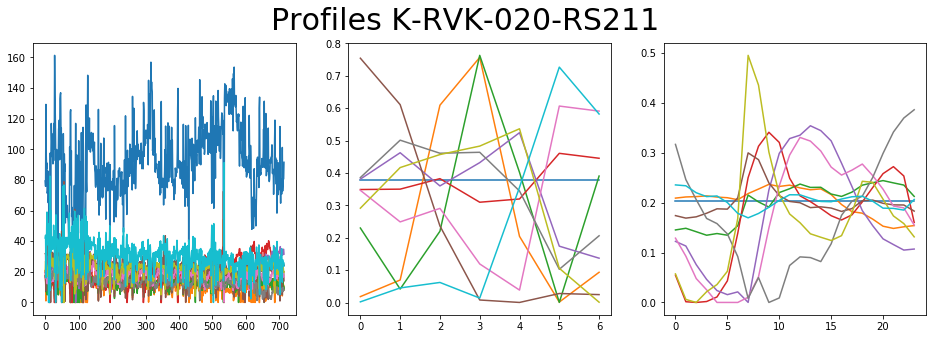

mean squared error 0.3337155852323946
abundance of each profile: [2543.20999429  350.28742788  367.89039744  570.84137885  583.94805837
  633.63116404  477.91411758  386.36398659  599.93846898  856.81794821]
Leak persentage: 34.5%


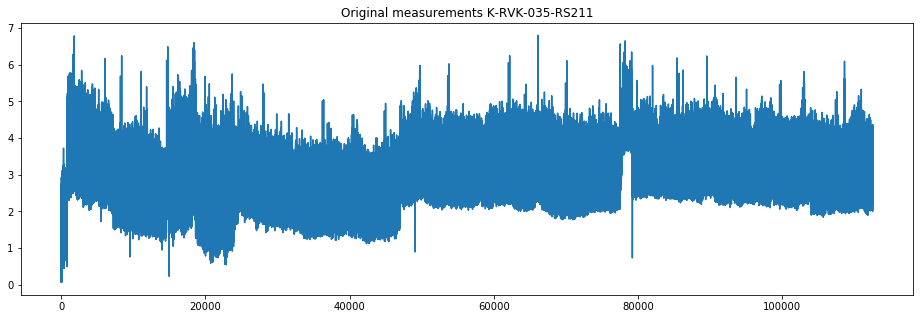

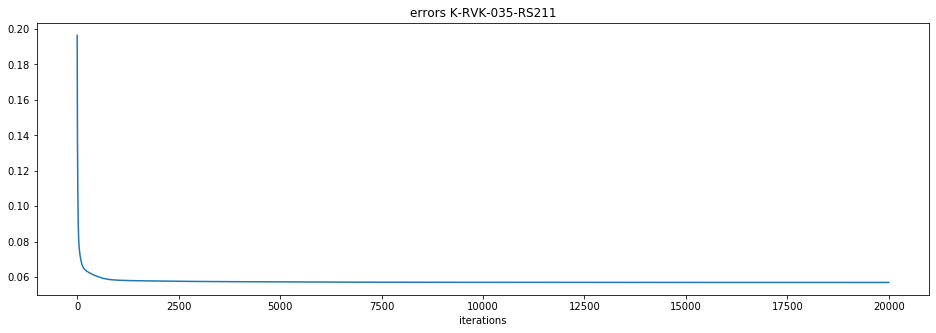

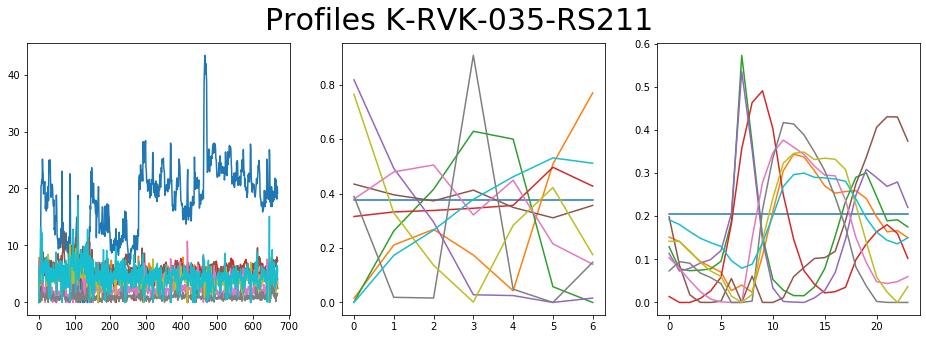

mean squared error 0.03638445140641586
abundance of each profile: [487.44346347 134.75135293 122.70039386 133.40093968 115.38532322
 167.71164301  79.79118391  33.86595159 107.05625649 131.96869884]
Leak persentage: 32.19%


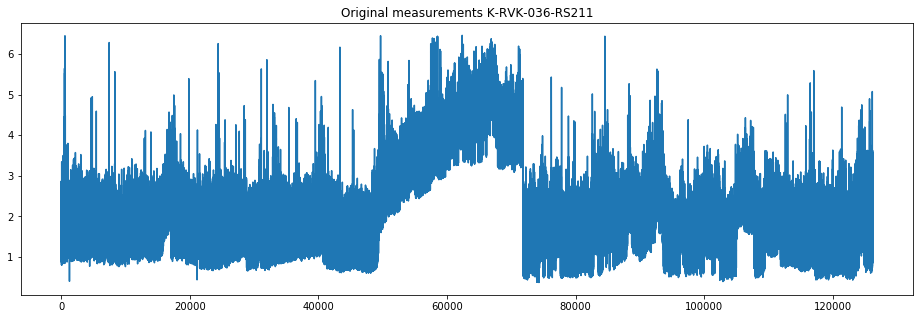

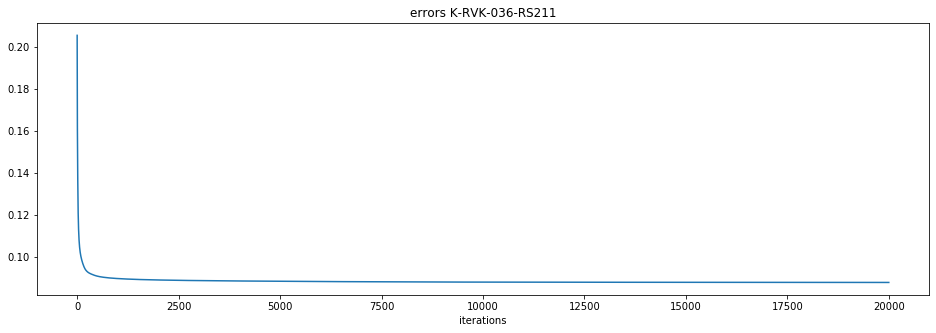

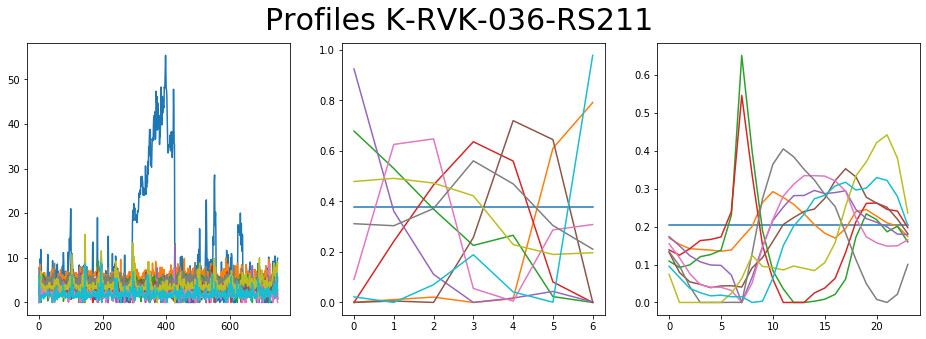

mean squared error 0.04566288553360489
abundance of each profile: [435.88227402 153.32830408 123.12881627 107.15457898  76.22517509
  82.41197607  60.32097802 131.12711362 120.20643233  60.29430315]
Leak persentage: 32.29%


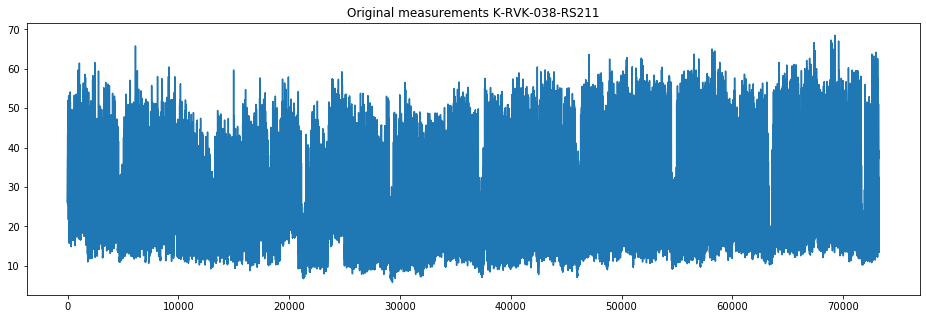

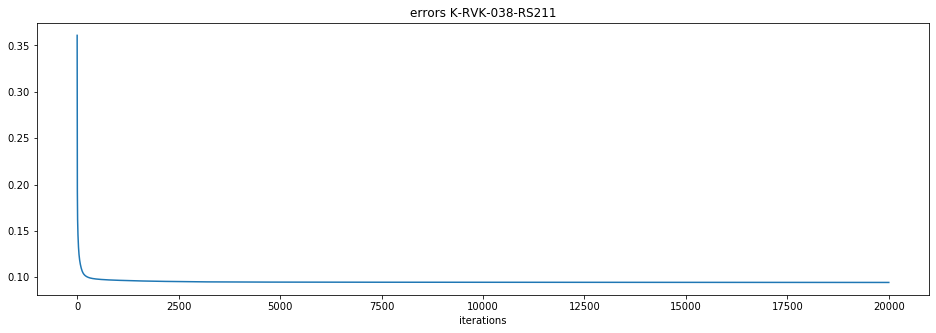

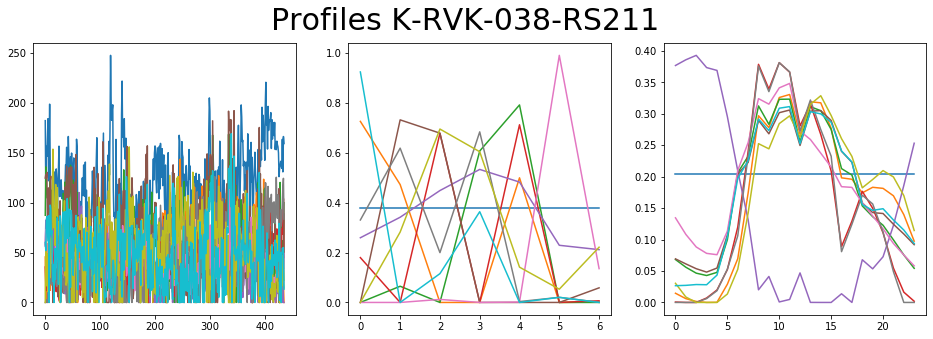

mean squared error 7.316402108671492
abundance of each profile: [2576.9494532  1233.77240924 1470.31160155  911.6853884   883.76652719
 1573.31761236  890.97383095 1071.64277497 1284.31492454 1184.50937663]
Leak persentage: 19.7%


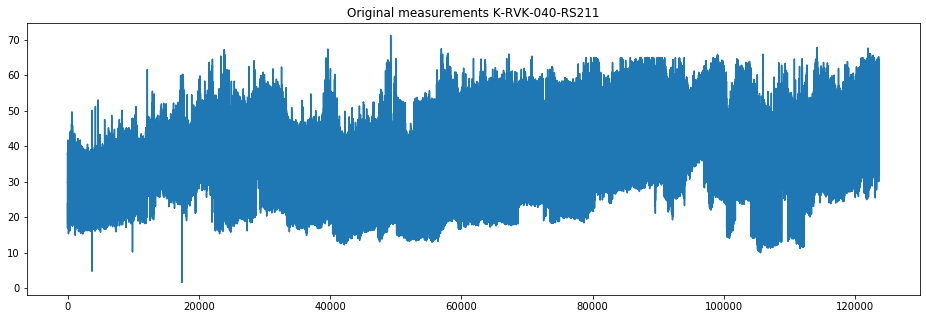

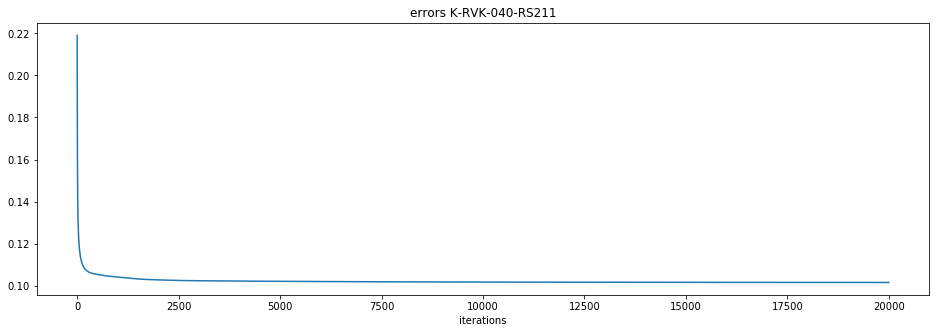

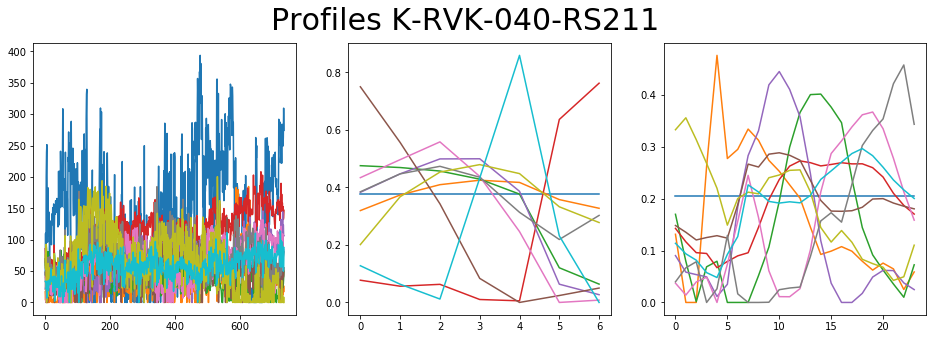

mean squared error 18.031707313379997
abundance of each profile: [4555.69476065 1298.08458343 1256.1786165  3182.64793309 1943.53703992
 1580.00952867 1935.04309219 2287.56166292 2141.98186726 1643.39940282]
Leak persentage: 20.87%


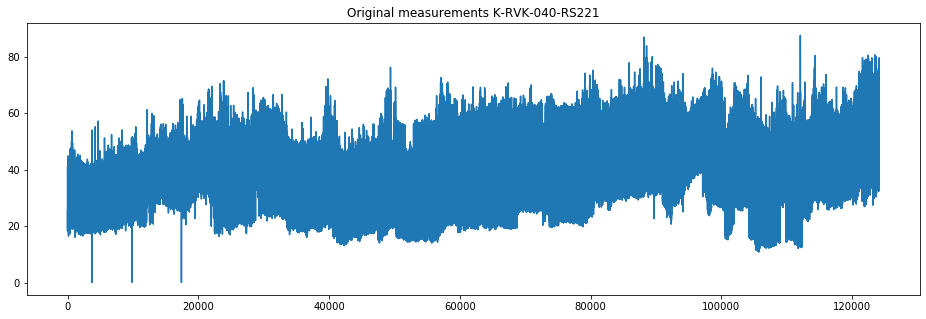

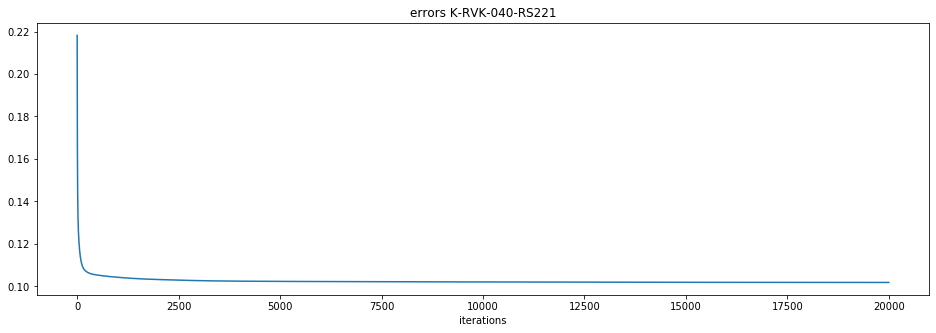

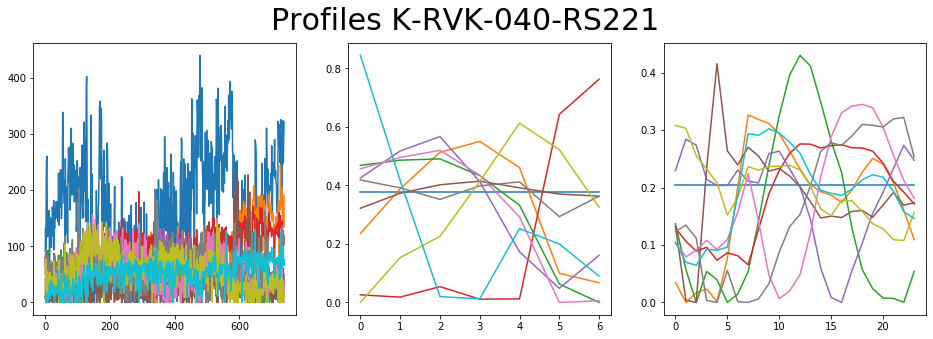

mean squared error 20.94060599747659
abundance of each profile: [5159.14129911 2586.22888968 1594.35681674 2742.07484288 1741.91056023
 1415.35137254 1854.43443527 1940.86132068 1716.1758499  1522.0638424 ]
Leak persentage: 23.16%


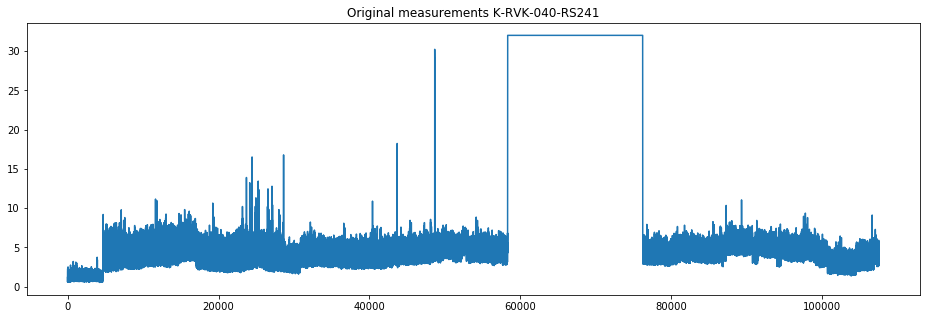

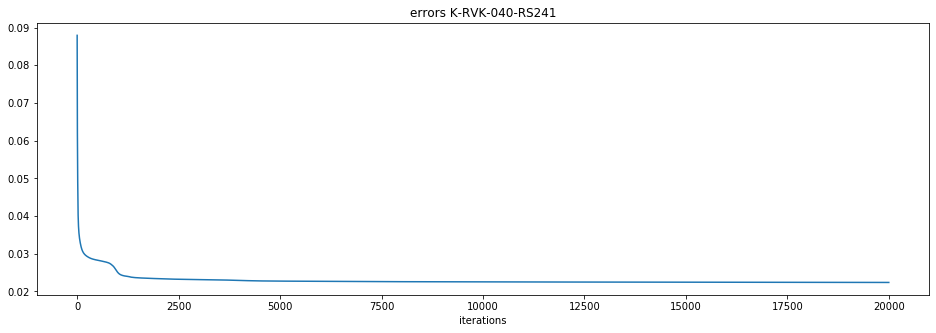

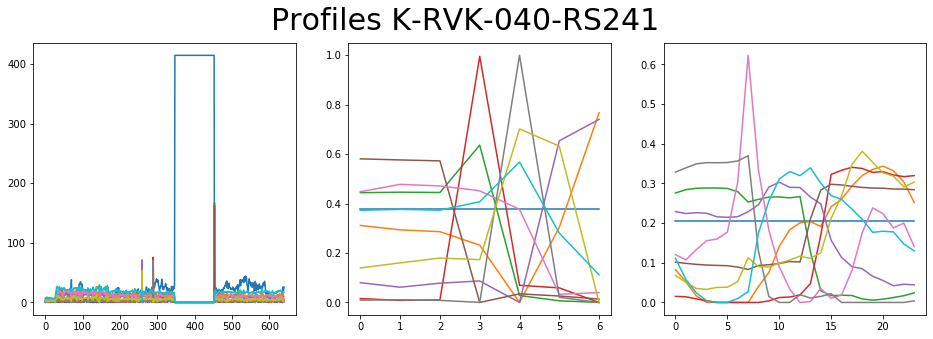

mean squared error 0.09516652176542355
abundance of each profile: [4290.56502978  313.2138652   182.42129121   87.48058836  237.39985744
  177.74307247  266.16134325   85.17528828  140.76113307  427.02328868]
Leak persentage: 69.11%


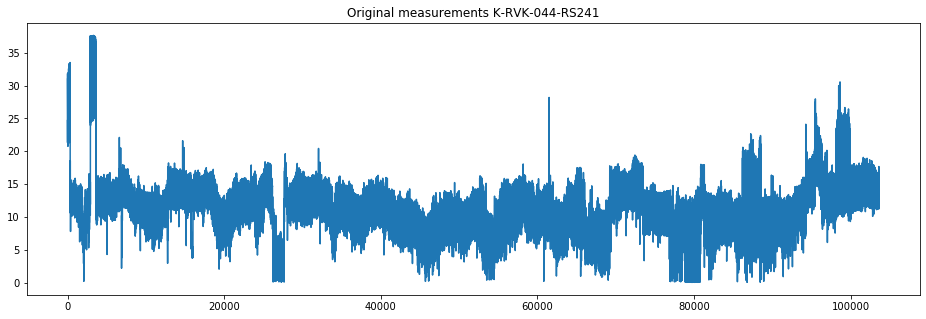

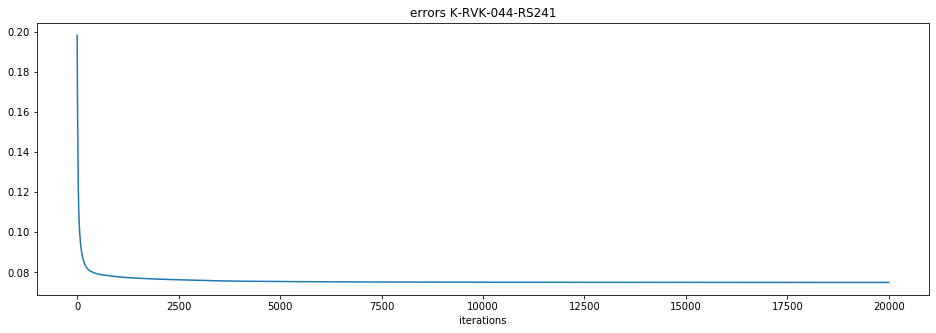

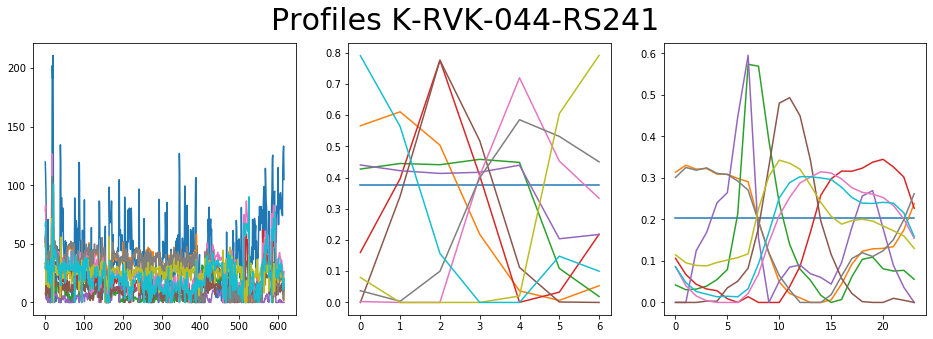

mean squared error 0.7733438587188778
abundance of each profile: [1225.72249271  781.58272888  370.71918624  534.6324904   243.98458501
  318.91763529  784.87148971  806.4203569   661.26977372  665.21469036]
Leak persentage: 19.17%


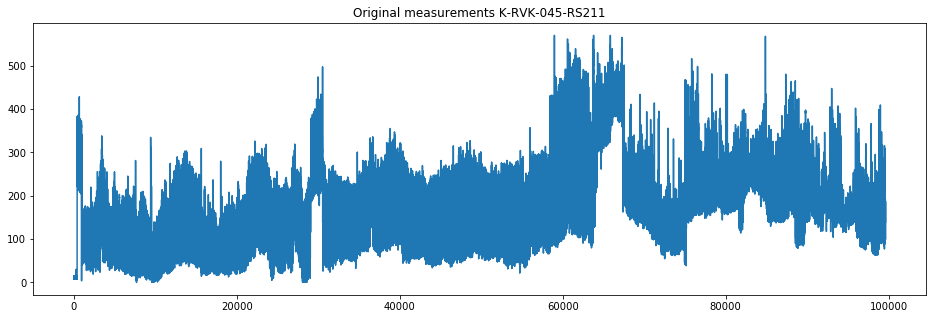

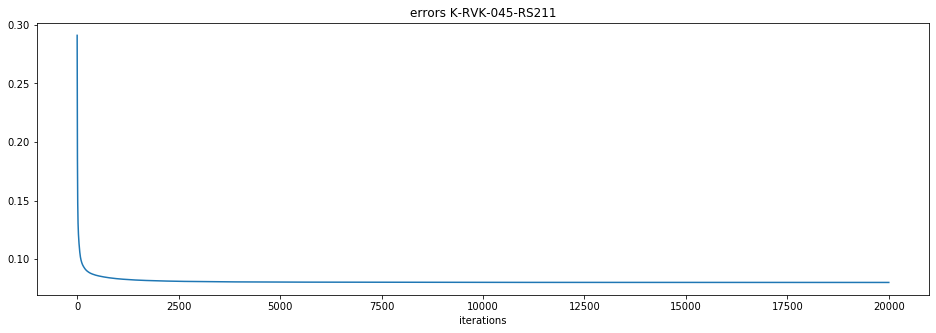

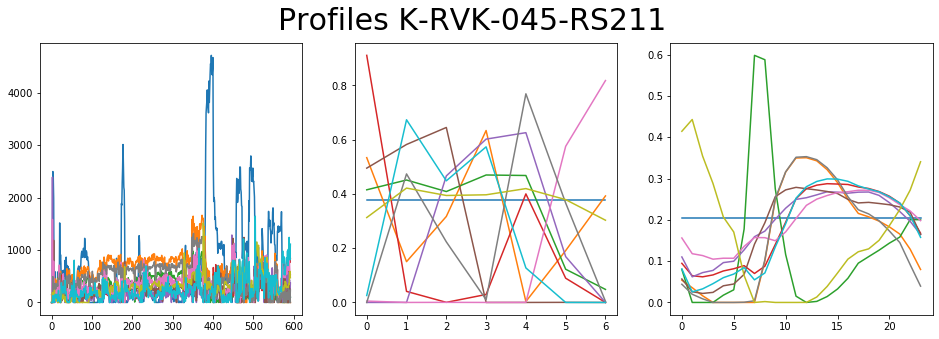

mean squared error 309.5304051681964
abundance of each profile: [27722.15930976 16427.57867216  9365.87599031  7221.25438113
  7021.66424296  7524.52318101 10633.03433718 13880.62631023
  9529.23418772  8476.61303125]
Leak persentage: 23.53%


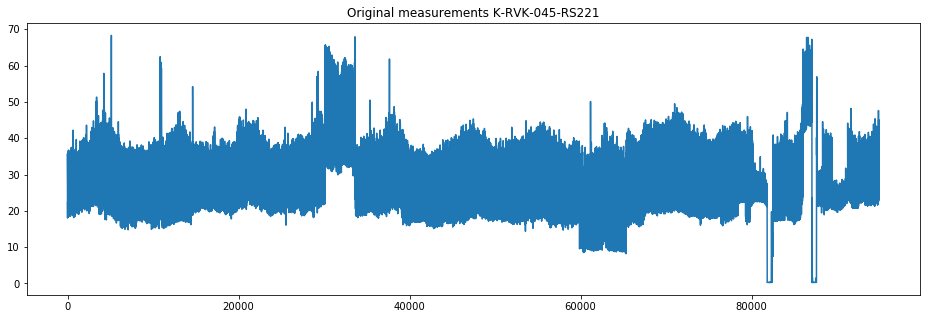

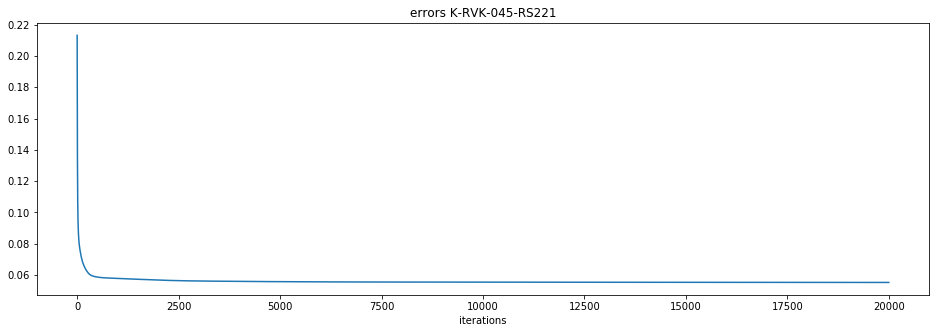

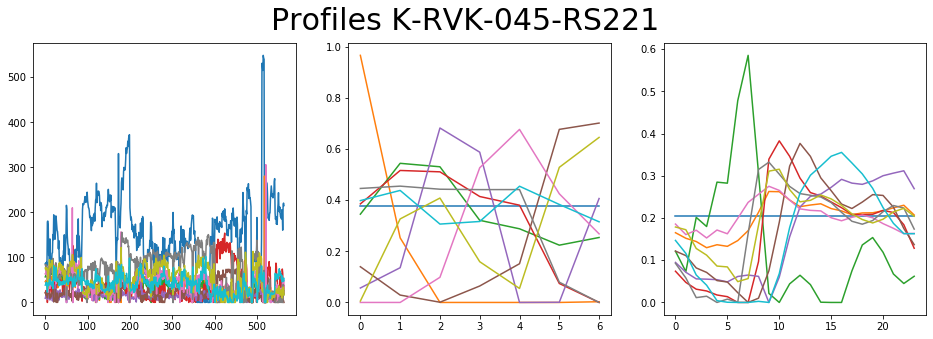

mean squared error 3.0702348881821724
abundance of each profile: [4131.19040053  894.69794993  826.0223081  1139.52969487  404.05452361
  758.46090917 1193.06103614 1973.50316012 1400.79647613 1068.11399019]
Leak persentage: 29.96%


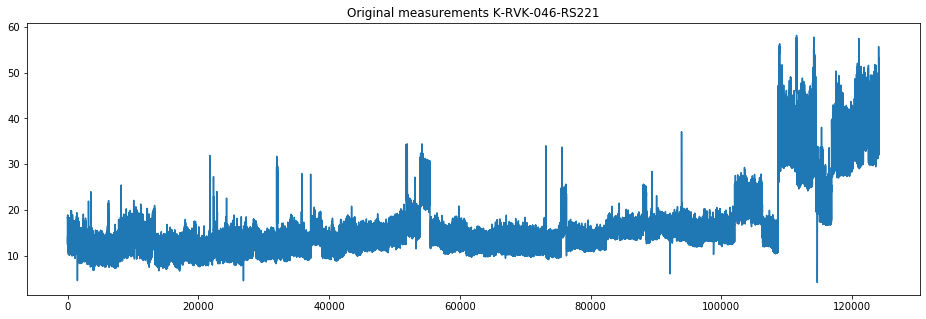

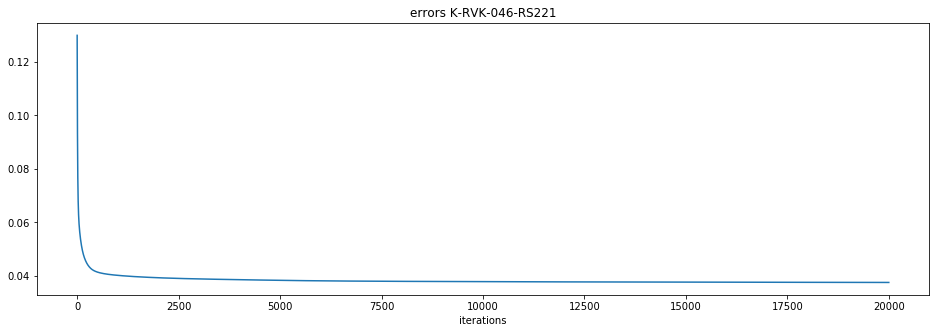

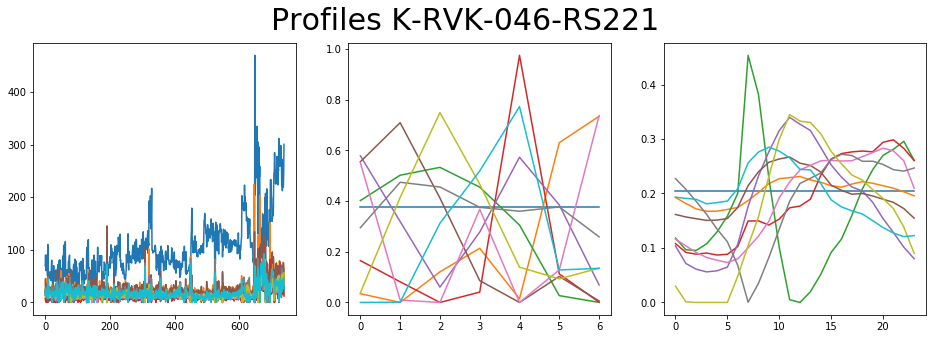

mean squared error 0.5038209417213342
abundance of each profile: [3223.18651078  980.2009663   469.18119376  333.13748461  647.31442535
  925.09884103  392.72052494  656.21651228  526.97849469  616.73250319]
Leak persentage: 36.75%


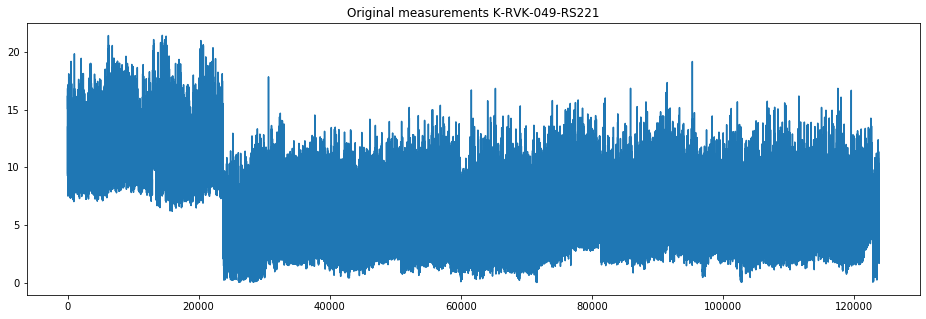

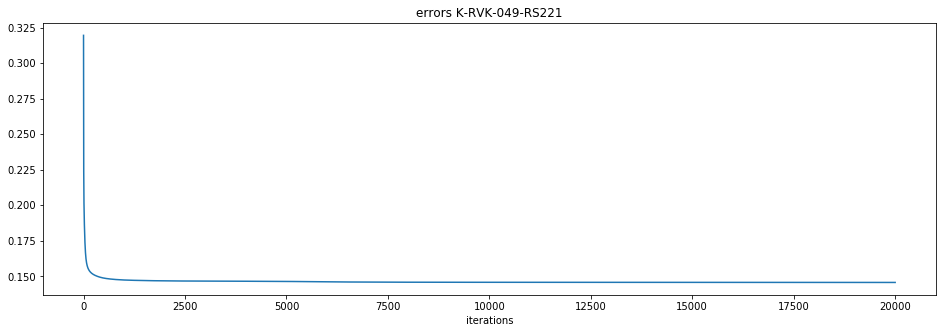

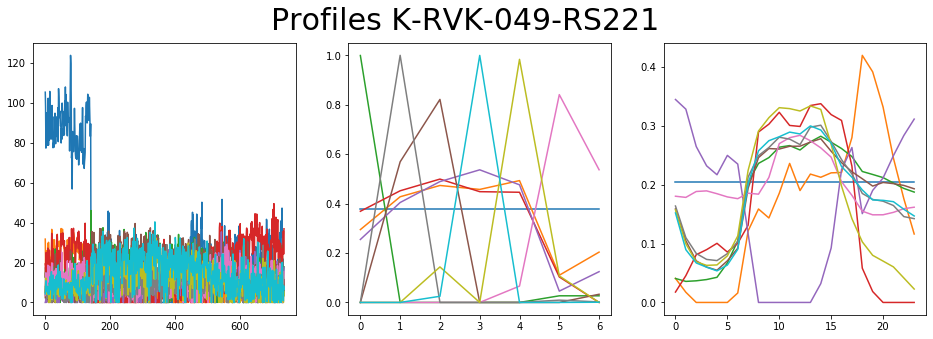

mean squared error 1.1826224771718299
abundance of each profile: [1135.41721815  364.37634328  521.73385213  537.48517285  308.90446795
  504.63333829  320.55233709  246.84419508  379.39586612  457.90639527]
Leak persentage: 23.77%


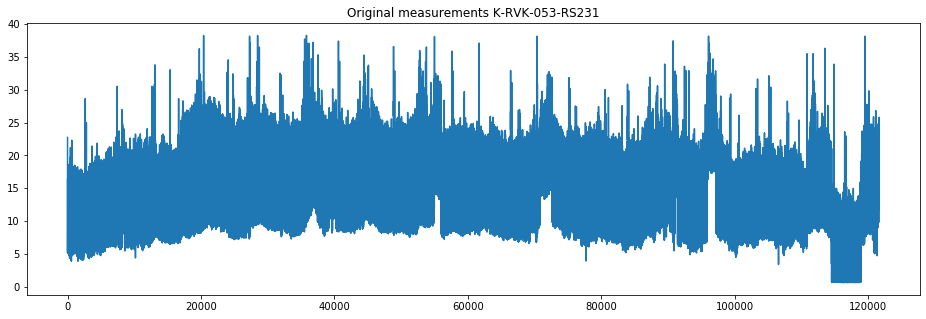

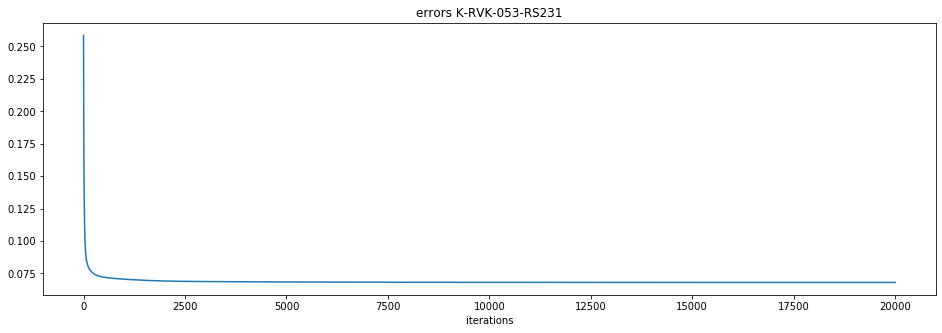

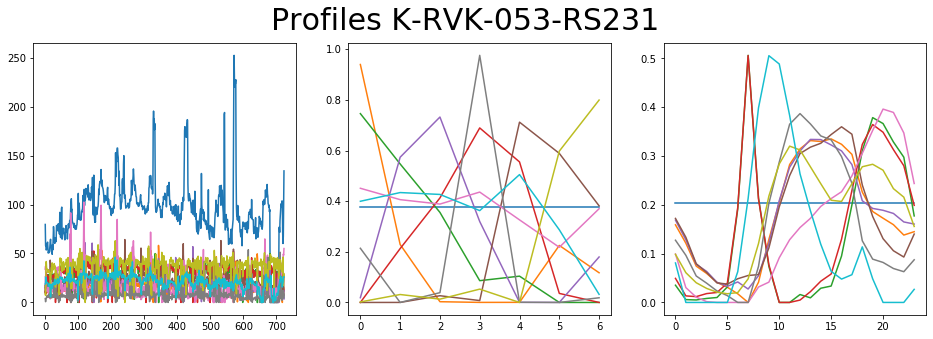

mean squared error 1.265293706119266
abundance of each profile: [2656.95743702  476.45196391  824.59540952  819.82918363  571.13571026
  673.29916224  653.48628521  285.33733507  998.8293716   600.90085362]
Leak persentage: 31.04%


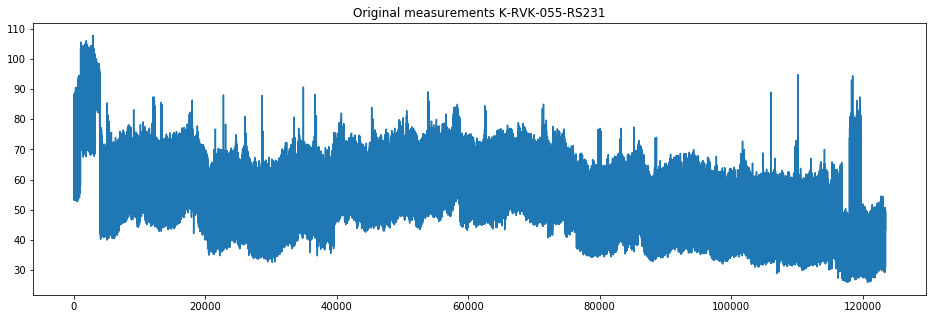

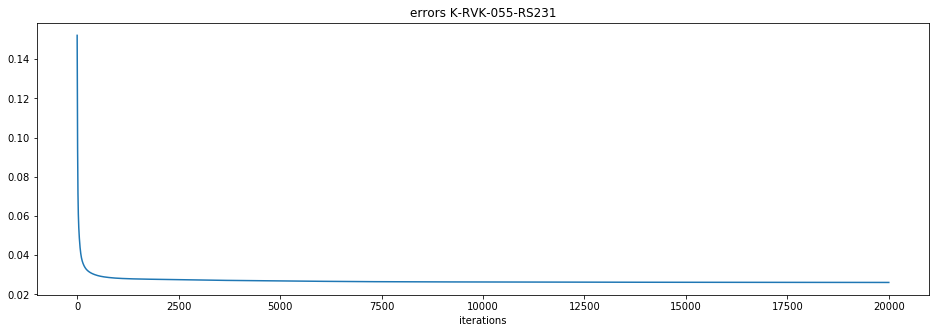

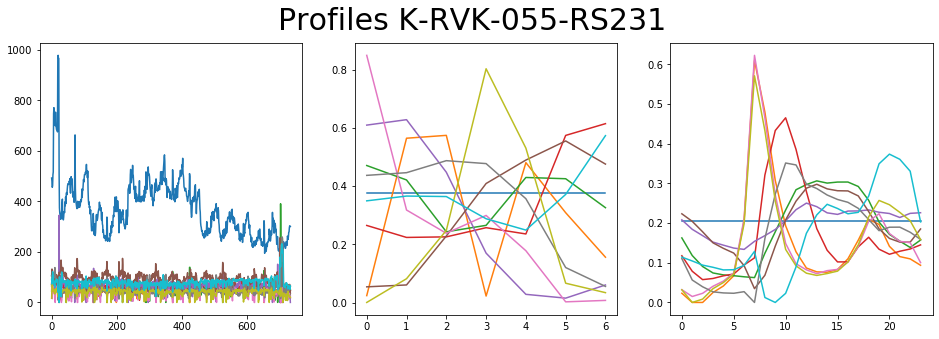

mean squared error 2.3667822977574877
abundance of each profile: [10455.06261213  1084.38625013  1583.81942964  1661.35406917
  1732.27617253  2555.47672163  1147.27385263  1622.269015
  1145.37276913  2216.19058865]
Leak persentage: 41.48%


In [64]:
key_list = [x for x in clean_sensor_dict]

for key in key_list:
    tmp_X = clean_sensor_dict[key]
    complete_weeks = ~np.isnan(tmp_X).reshape(-1,24*7).any(axis=1)
    X = tmp_X[complete_weeks,:]
    flat_factors = [(1,0),(2,0)]
    ####
    
    plt.figure(figsize=(16,5))
    plt.plot(X.ravel())
    plt.title(f'Original measurements {key}')
    plt.show()
    
    ####
    
    (core_tesnor,loadings),errors = non_negative_parafac_custom(X,
                                                            rank=10,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                    normalize_factors=False)
    l_weeks,l_days,l_hours = loadings
    
    ####
    
    
    plt.figure(figsize=(16,5))
    plt.plot(errors)
    plt.title(f'errors {key}')
    plt.xlabel('iterations')
    plt.show()
    
    ###
    new_weights,normalized_loadings = kruskal_normalise((np.ones(10),
                                                         loadings))
    
    l_weeks,l_days,l_hours = normalized_loadings
    f,ax = plt.subplots(1,3,figsize=(16,5))
    ax[0].plot(new_weights*l_weeks)
    ax[1].plot(l_days)
    ax[2].plot(l_hours)
    plt.suptitle(f'Profiles {key}',fontsize=(30))
    plt.show()
    
    ###
    
    reconstructed = khatri_rao(loadings)
    residuals = khatri_rao(loadings).sum(axis=1)-X.ravel()
    print('mean squared error',np.mean(residuals**2))
    print('abundance of each profile:',new_weights)
    print(f'Leak persentage: {np.round(100*new_weights[0]/np.sum(new_weights),2)}%')

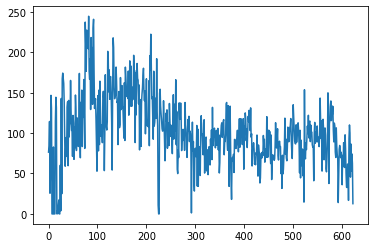

In [26]:
plt.plot(loadings[0][:,0])

In [30]:
reconstructed = khatri_rao(loadings)

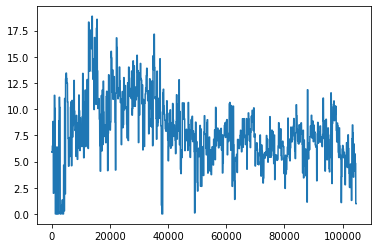

In [51]:
pd.DataFrame(reconstructed).corr()

0         1         2         3         4         5         6  \
0  1.000000 -0.007139 -0.015805 -0.269923 -0.019232  0.017851 -0.232614   
1 -0.007139  1.000000 -0.121147  0.123633  0.124706  0.418719 -0.150437   
2 -0.015805 -0.121147  1.000000  0.291685  0.042259  0.214060 -0.375226   
3 -0.269923  0.123633  0.291685  1.000000  0.282966  0.402998 -0.451909   
4 -0.019232  0.124706  0.042259  0.282966  1.000000  0.232904 -0.216068   
5  0.017851  0.418719  0.214060  0.402998  0.232904  1.000000 -0.551762   
6 -0.232614 -0.150437 -0.375226 -0.451909 -0.216068 -0.551762  1.000000   
7  0.033543 -0.003599 -0.182268 -0.106048  0.033413 -0.059673  0.111742   
8 -0.017981 -0.214611 -0.052475 -0.215585 -0.079050 -0.284998  0.310320   
9 -0.013740 -0.003872 -0.025349 -0.331038  0.045224 -0.254562  0.208566   

          7         8         9  
0  0.033543 -0.017981 -0.013740  
1 -0.003599 -0.214611 -0.003872  
2 -0.182268 -0.052475 -0.025349  
3 -0.106048 -0.215585 -0.331038  
4  0.033413 -0.079050  0.045224  
5 -0.059673 -0.284998 -0.254562  
6  0.111742  0.310320  0.208566  
7  1.000000  0.350140 -0.099321  
8  0.350140  1.000000  0.137322  
9 -0.099321  0.137322  1.000000

In [54]:
(pd.DataFrame(reconstructed).corr()*(np.eye(10)-1)*-1)

0         1         2         3         4         5         6  \
0 -0.000000 -0.007139 -0.015805 -0.269923 -0.019232  0.017851 -0.232614   
1 -0.007139 -0.000000 -0.121147  0.123633  0.124706  0.418719 -0.150437   
2 -0.015805 -0.121147 -0.000000  0.291685  0.042259  0.214060 -0.375226   
3 -0.269923  0.123633  0.291685 -0.000000  0.282966  0.402998 -0.451909   
4 -0.019232  0.124706  0.042259  0.282966 -0.000000  0.232904 -0.216068   
5  0.017851  0.418719  0.214060  0.402998  0.232904 -0.000000 -0.551762   
6 -0.232614 -0.150437 -0.375226 -0.451909 -0.216068 -0.551762 -0.000000   
7  0.033543 -0.003599 -0.182268 -0.106048  0.033413 -0.059673  0.111742   
8 -0.017981 -0.214611 -0.052475 -0.215585 -0.079050 -0.284998  0.310320   
9 -0.013740 -0.003872 -0.025349 -0.331038  0.045224 -0.254562  0.208566   

          7         8         9  
0  0.033543 -0.017981 -0.013740  
1 -0.003599 -0.214611 -0.003872  
2 -0.182268 -0.052475 -0.025349  
3 -0.106048 -0.215585 -0.331038  
4  0.033413 -0.079050  0.045224  
5 -0.059673 -0.284998 -0.254562  
6  0.111742  0.310320  0.208566  
7 -0.000000  0.350140 -0.099321  
8  0.350140 -0.000000  0.137322  
9 -0.099321  0.137322 -0.000000

In [57]:
# plt.figure(figsize=(10,10))
# heatmap(pd.DataFrame(reconstructed).corr(),mask = np.eye(10),annot=True,)

In [ ]:
plt.plot(reconstructed[:,1:].sum(axis=1))
plt.plot(reconstructed[:,0])

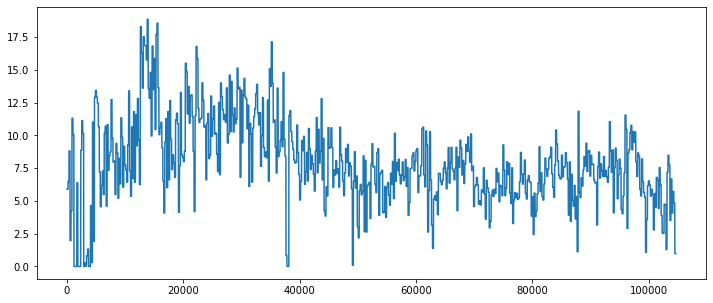

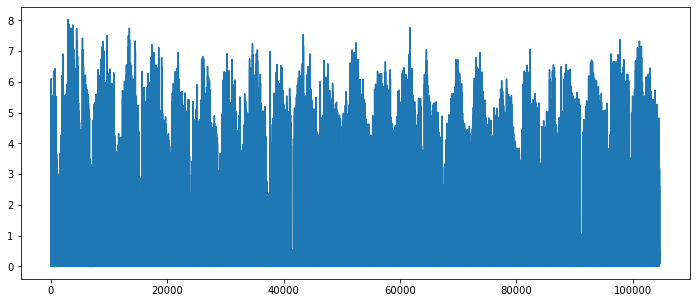

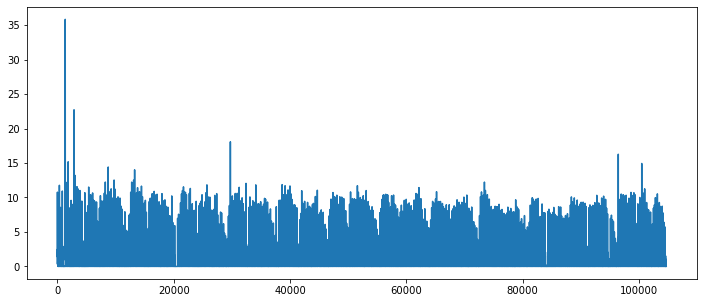

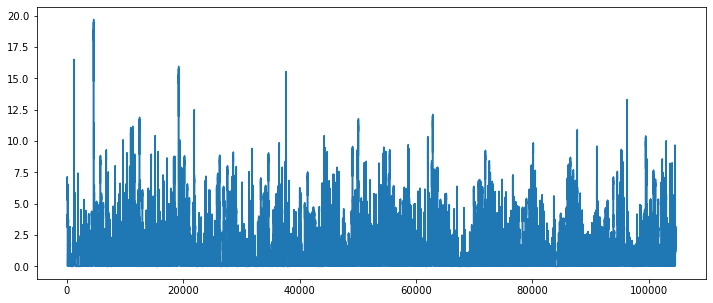

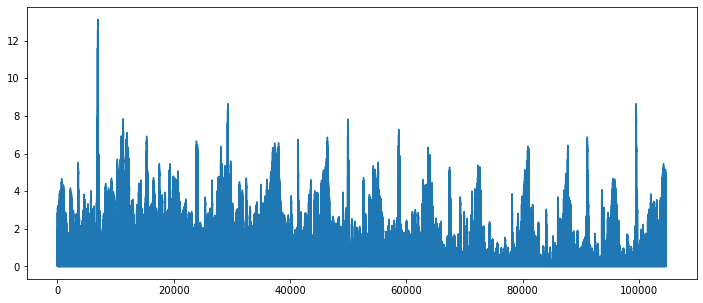

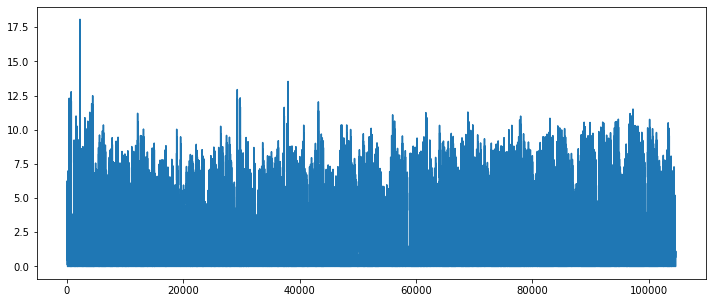

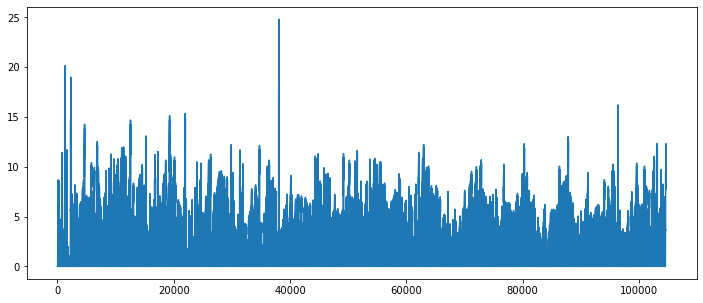

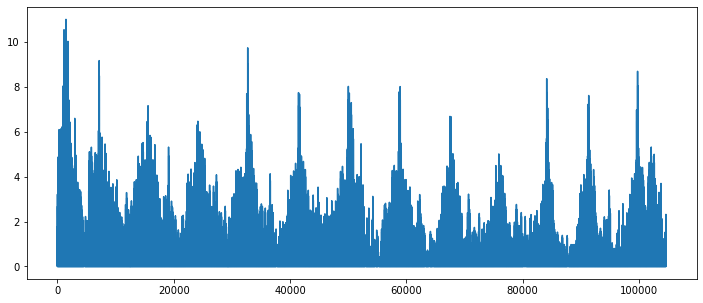

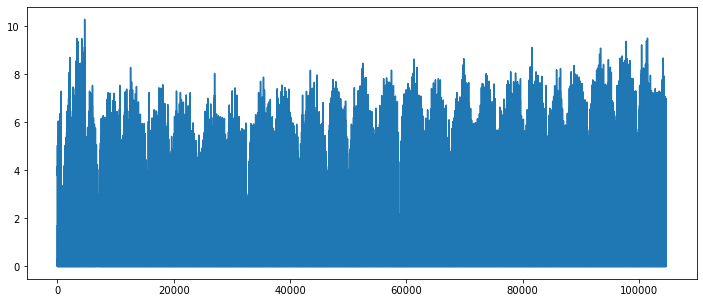

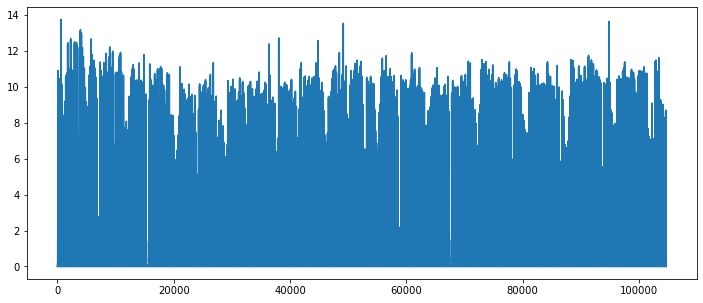

In [62]:
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,0]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,1]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,2]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,3]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,4]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,5]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,6]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,7]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,8]);plt.show()
plt.figure(figsize=(12,5));plt.plot(reconstructed[:,9]);plt.show()

# Problems:

1. Normalization of factors kinda necessary for readability (After fixing, much better)
2. Application of flat profiles between the computation of each mode could help stabilize the error profile and reduce MSE (After fixing, slightly better and smaller abundance of flat profile for almost everything) 


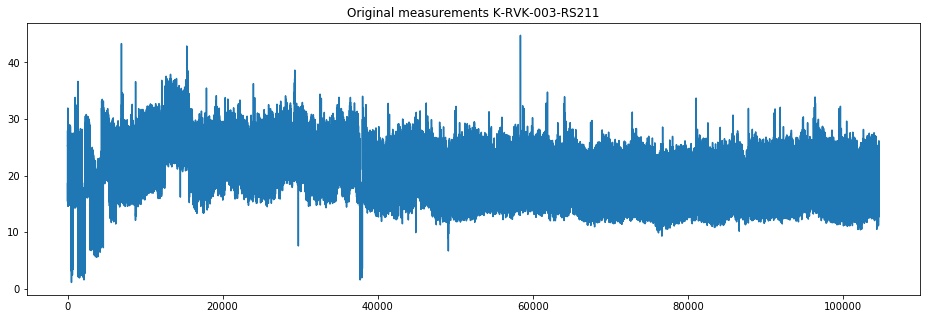

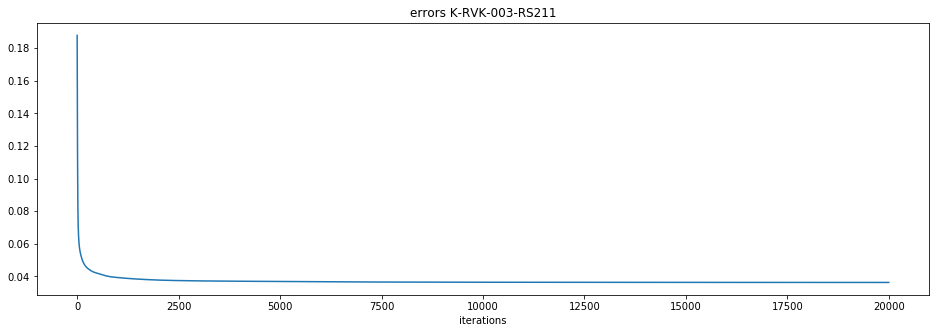

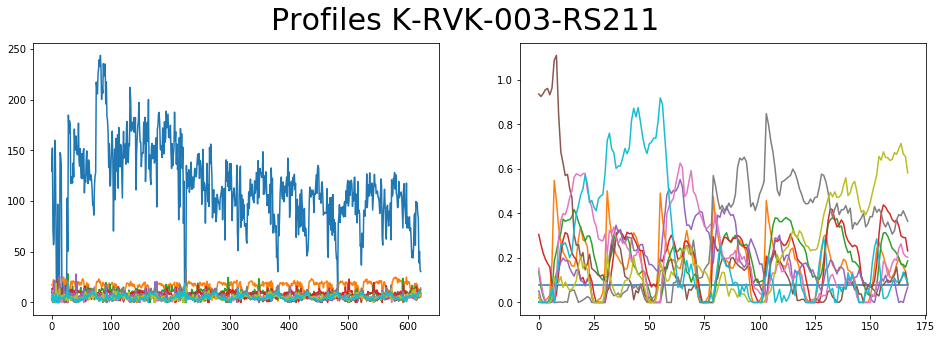

mean squared error 0.6638448655896693
abundance of each profile: [3045.74685879 1076.09655875  742.30318598  662.69169035  546.31162899
  463.50162489  518.27191441  808.7844624   540.22177556  640.20493955]
Leak persentage: 33.68%


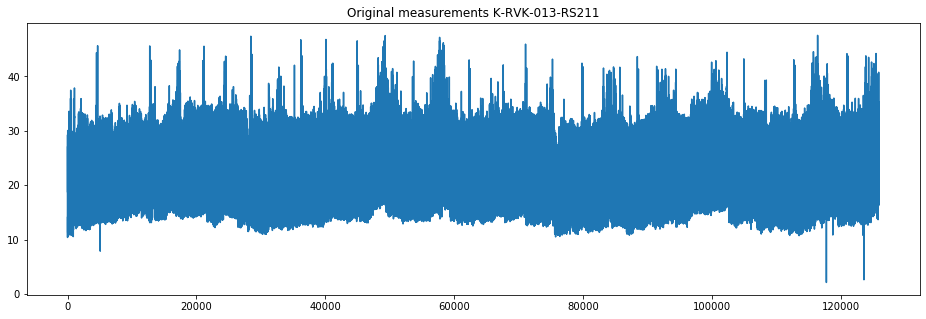

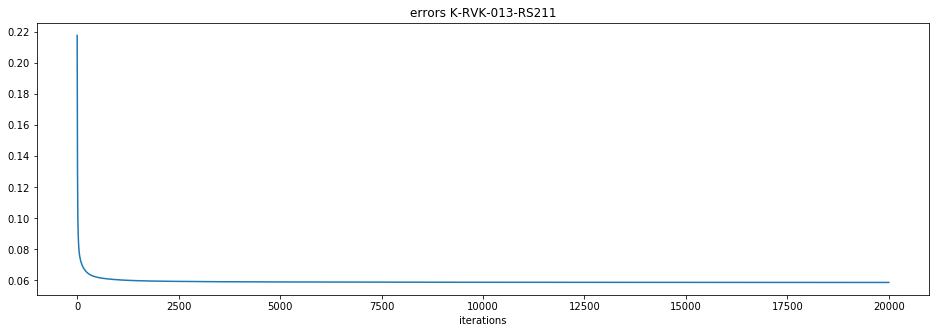

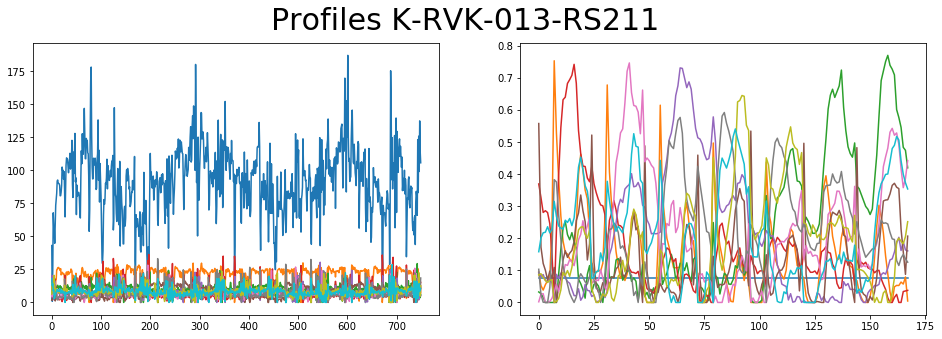

mean squared error 1.996669493135123
abundance of each profile: [2590.87068338 1529.97820545 1208.42409085  856.21134018  891.80018625
  602.03123152  801.32045474  946.34711377  784.31400105  838.66273731]
Leak persentage: 23.45%


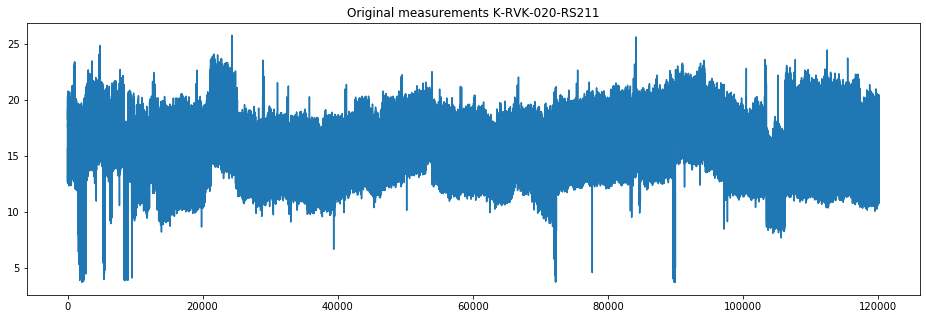

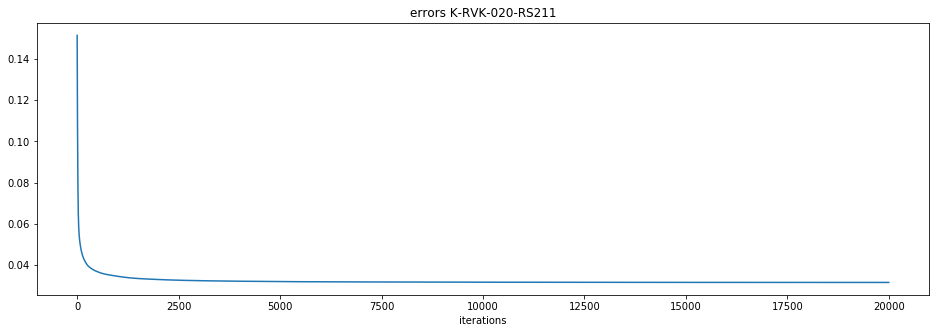

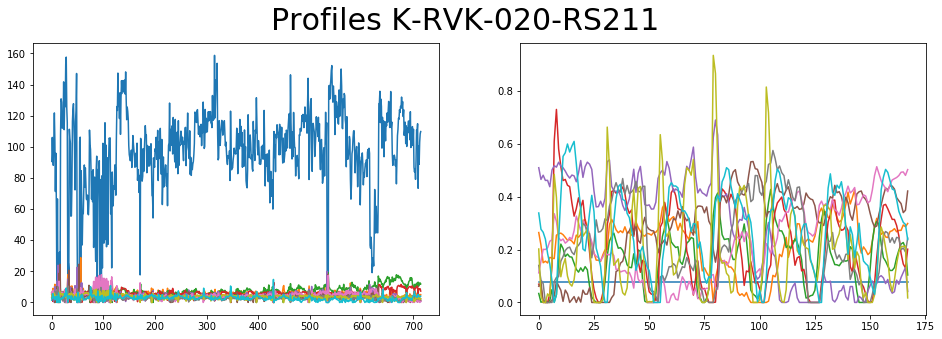

mean squared error 0.2848335077077873
abundance of each profile: [2706.81105037  522.08592476  515.46671817  552.0460686   622.94852
  477.27790617  470.21263144  297.12665153  371.83782478  357.67278198]
Leak persentage: 39.27%


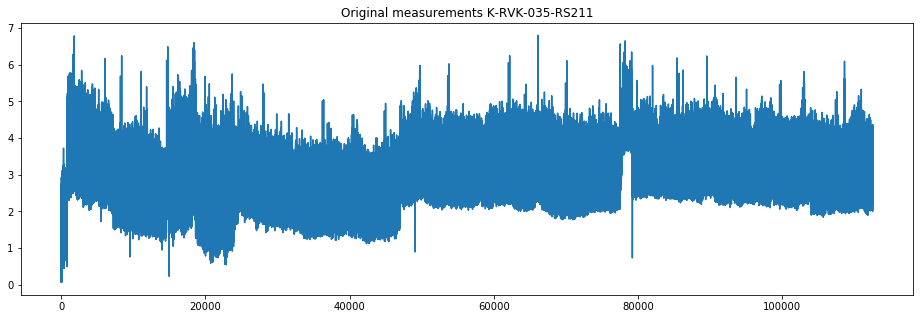

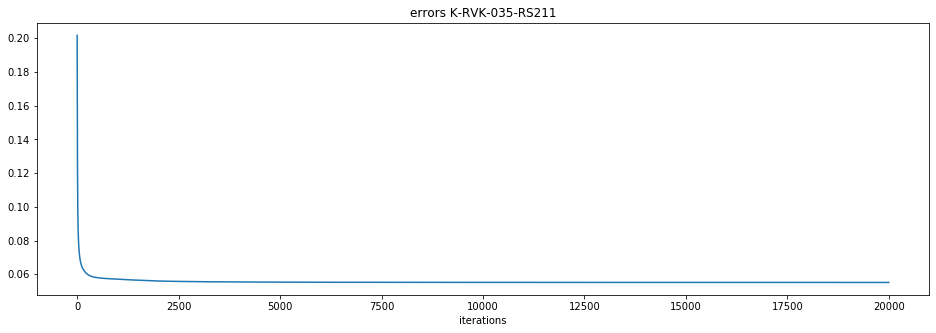

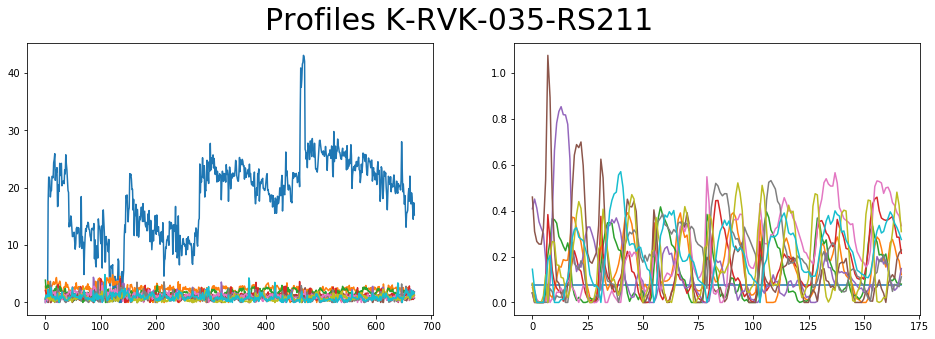

mean squared error 0.03399005580280511
abundance of each profile: [509.96355806 145.34802366 106.48481315  83.63978821  88.07872767
  97.31665933 115.7321453   82.71282325  74.79773322  90.47024477]
Leak persentage: 36.57%


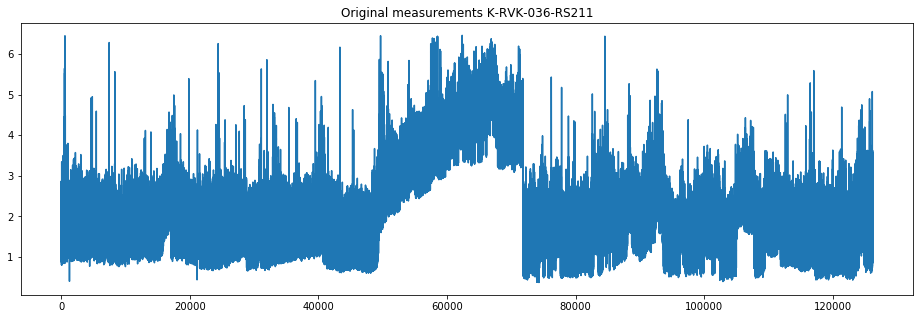

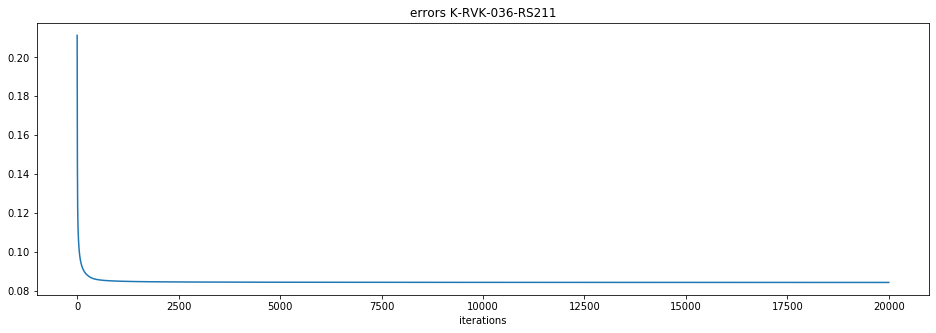

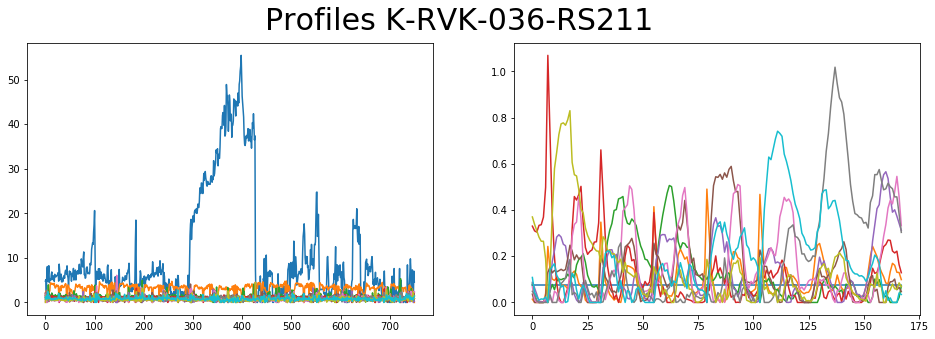

mean squared error 0.04225271695751317
abundance of each profile: [442.28789224 149.41245742  91.05324047  81.23007736  65.54882258
  62.9543594   77.62579761 105.8905335   67.05670086  82.52595453]
Leak persentage: 36.09%


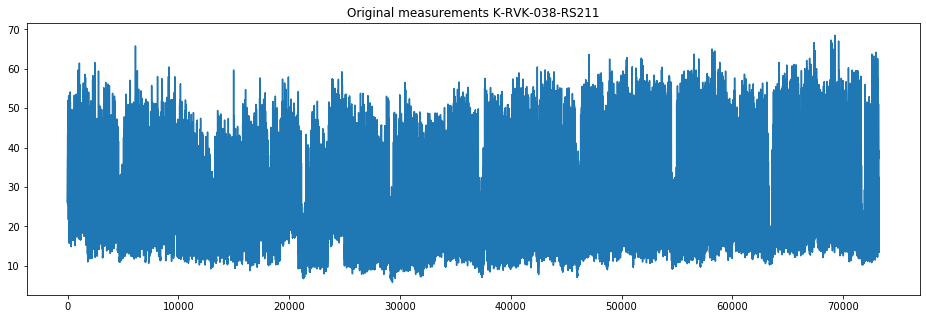

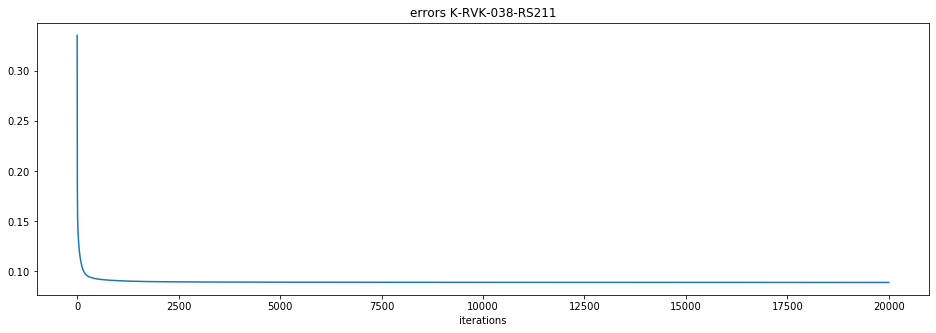

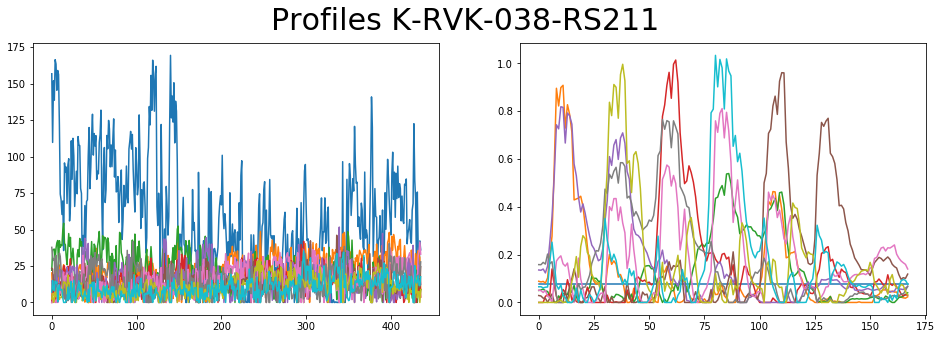

mean squared error 6.510676537386632
abundance of each profile: [1498.97437305 1541.57416299 1221.21883407 1212.23462757 1407.30300599
 1192.82081464 1334.88785722 1202.22531292  936.97999618  925.50005445]
Leak persentage: 12.02%


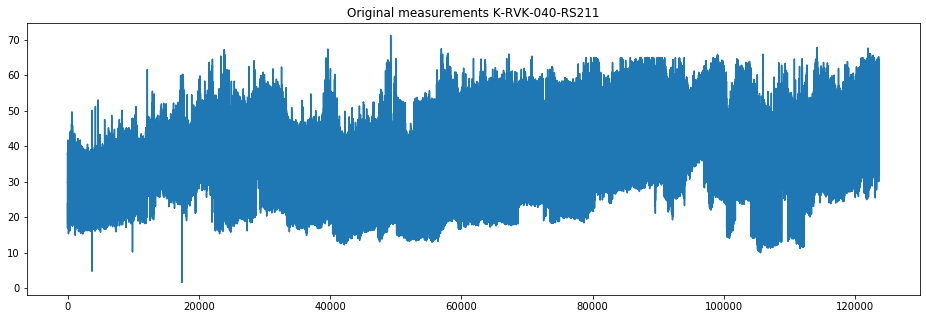

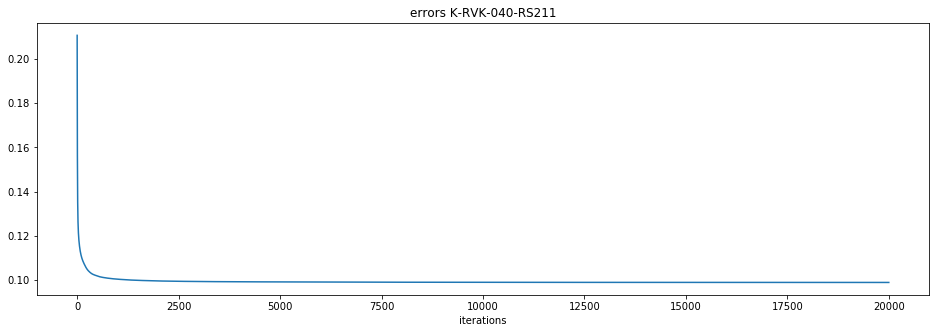

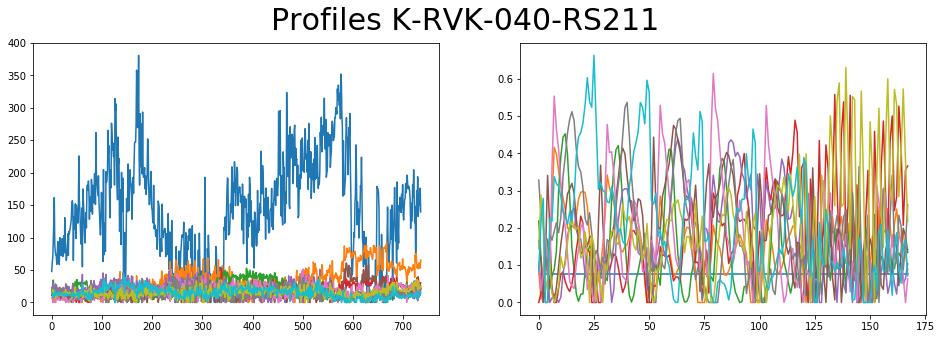

mean squared error 17.06367802731389
abundance of each profile: [4406.01808387 2409.73956553 1324.63409627 1702.80380956 1538.74908869
 1607.57643517 1515.12038924 1233.48634217 1488.99542476 1569.15130227]
Leak persentage: 23.44%


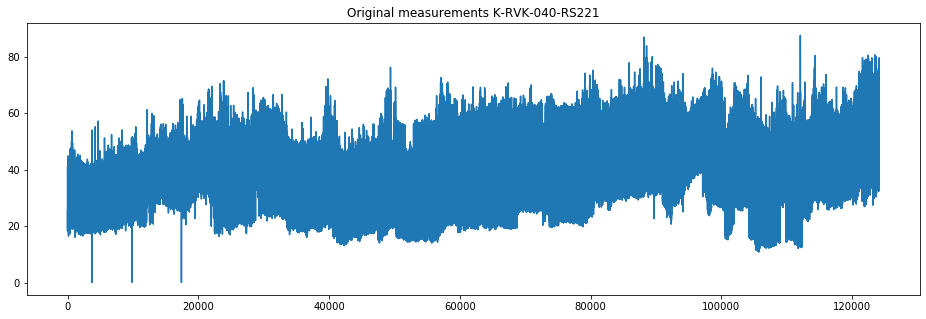

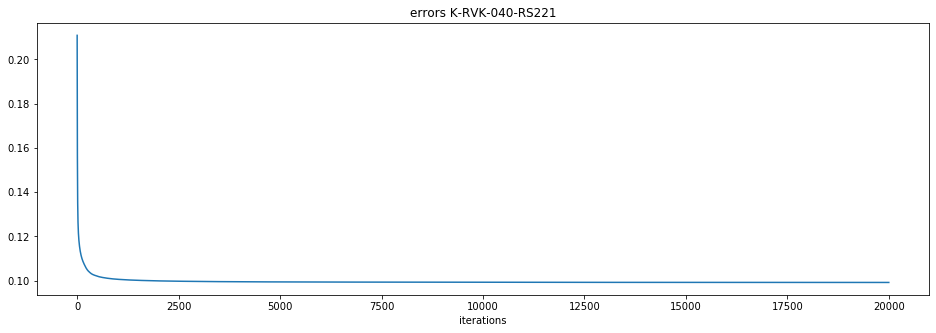

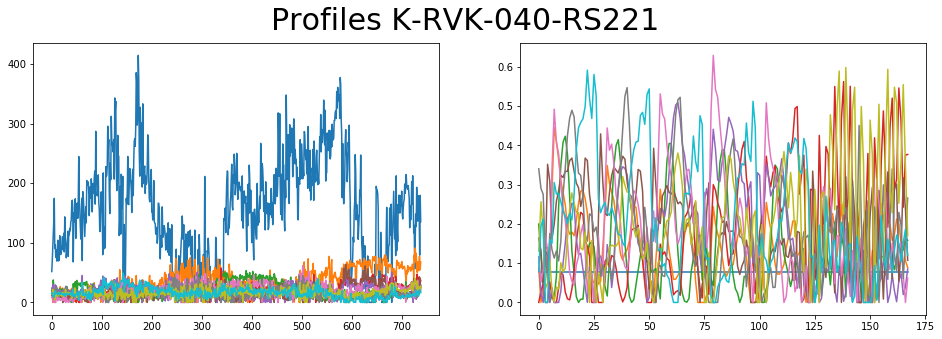

mean squared error 19.861232650463315
abundance of each profile: [4855.06545511 2379.72017948 1353.67663613 1923.40725181 1745.50215981
 1579.06833665 1761.97334187 1327.89817905 1591.83366418 1697.09206901]
Leak persentage: 24.02%


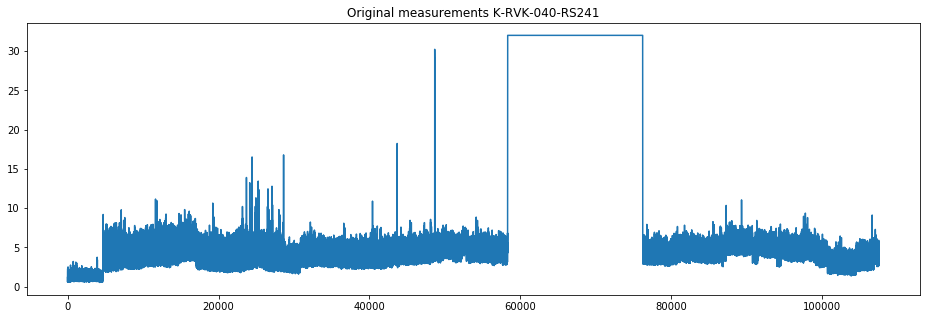

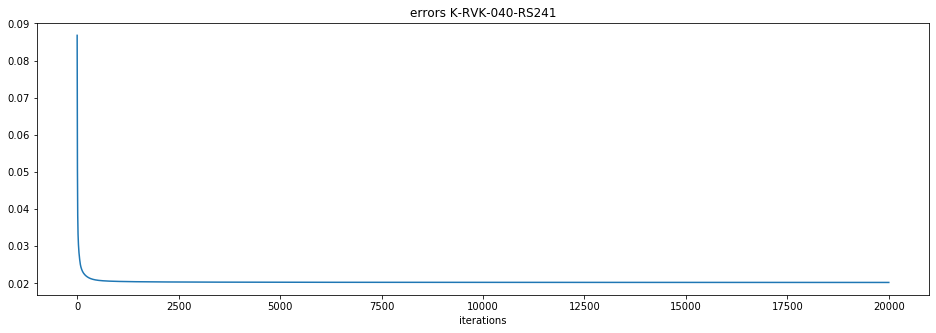

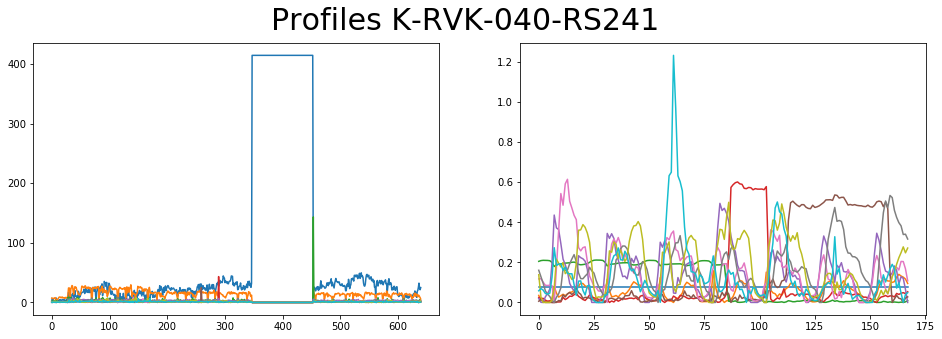

mean squared error 0.07776011567631205
abundance of each profile: [4304.05938532  317.47421318  295.96014859  131.43901303  177.13116503
  149.55484382  115.5810984   129.85123276  128.05752951   93.41797363]
Leak persentage: 73.67%


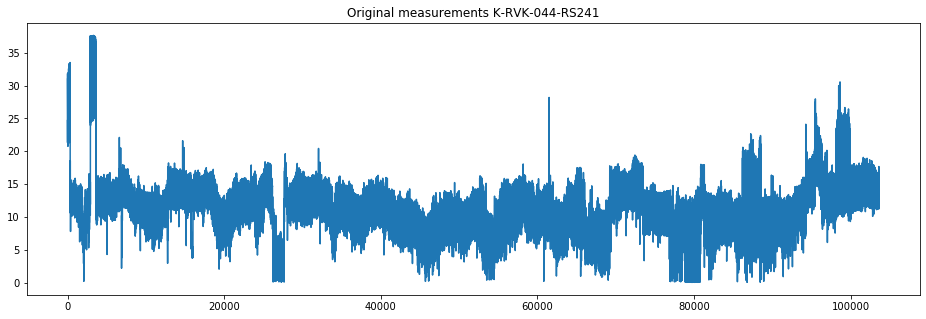

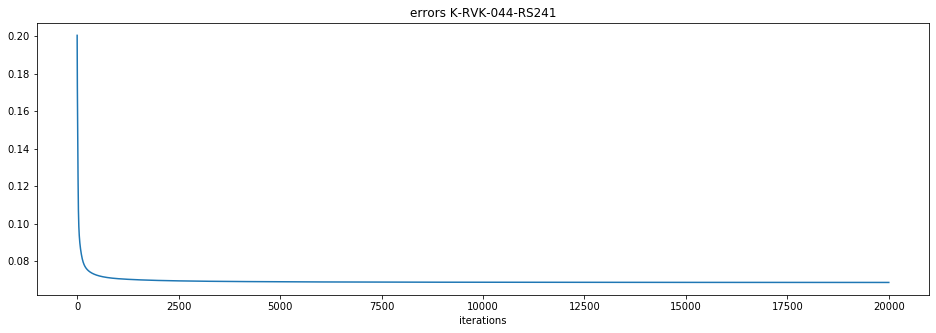

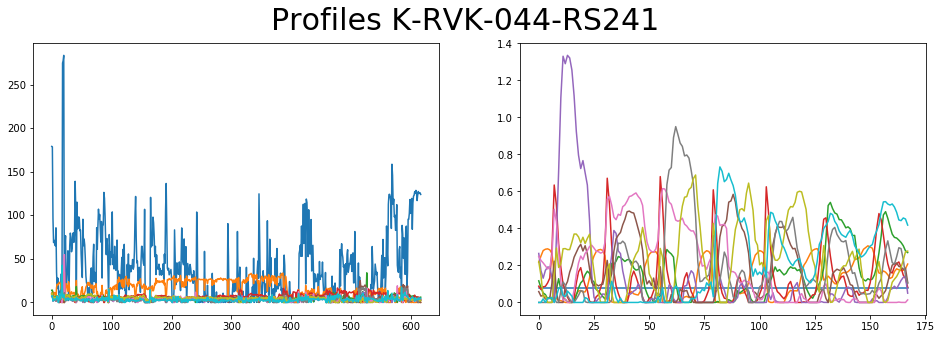

mean squared error 0.6496778478234558
abundance of each profile: [1409.9483521   984.26603107  354.28626354  490.77651064  413.92731218
  407.33210313  434.05413059  423.27123515  493.41294641  416.64739496]
Leak persentage: 24.19%


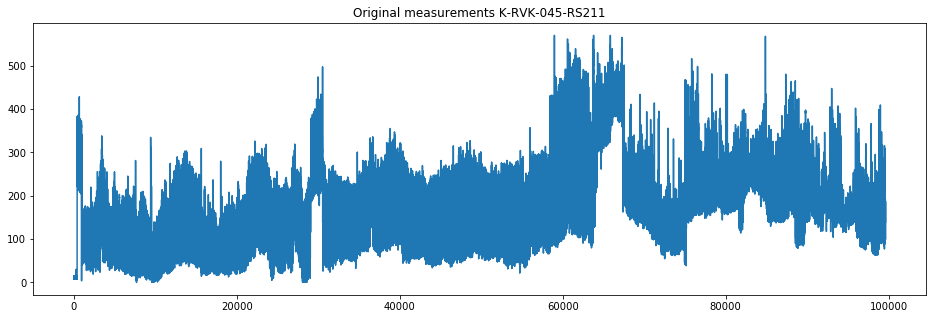

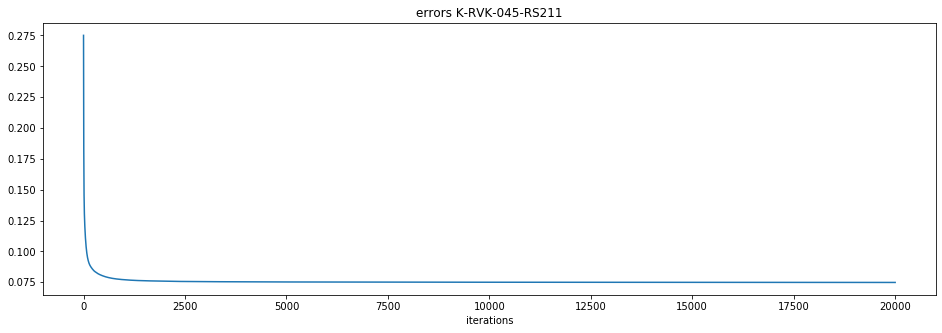

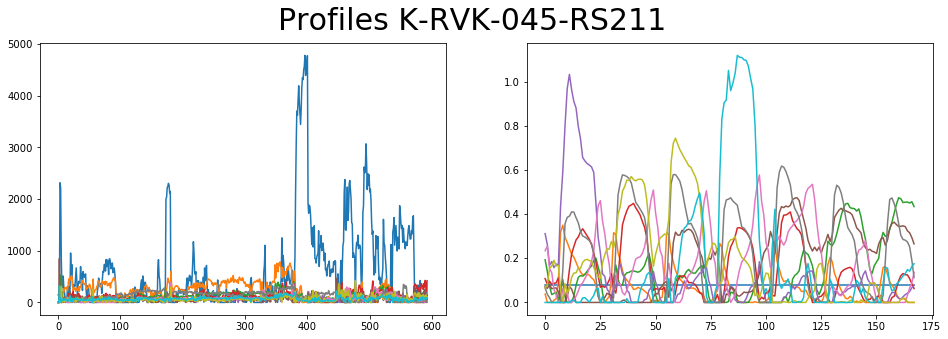

mean squared error 270.66867093958047
abundance of each profile: [26683.90184979 10685.04995739  9494.78302277  8563.65243464
  6430.8557787   7215.14409896  7160.68665505 15866.67896397
  7671.85978923  8560.71997466]
Leak persentage: 24.63%


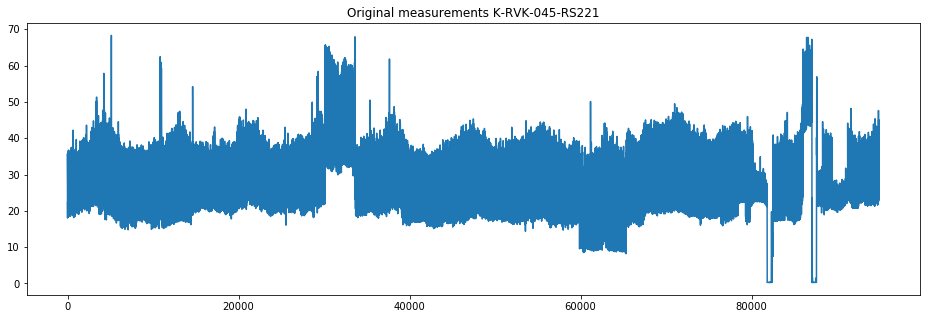

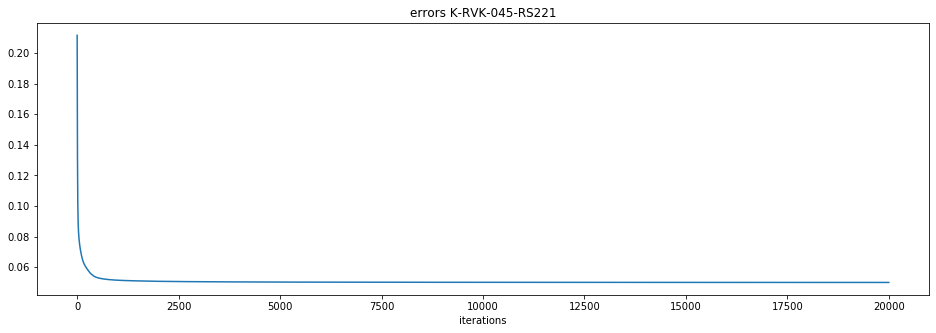

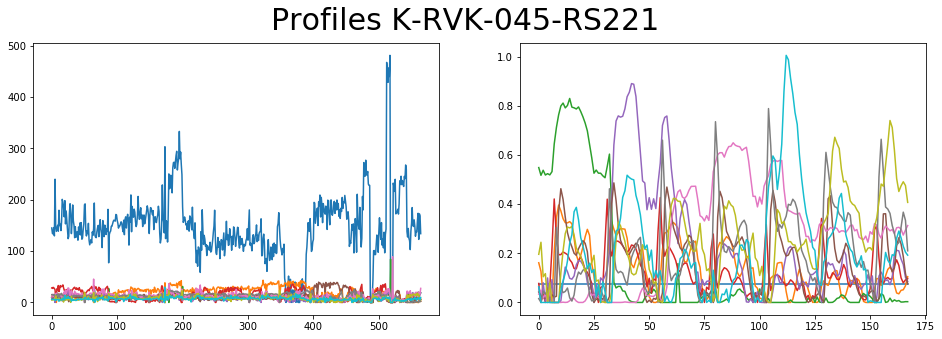

mean squared error 2.527394877137344
abundance of each profile: [3798.56737236 1184.887549   1089.24127588  798.11732595 1011.02442248
  911.38336002 1519.07526357 1068.00076718  843.12245562  699.42479588]
Leak persentage: 29.39%


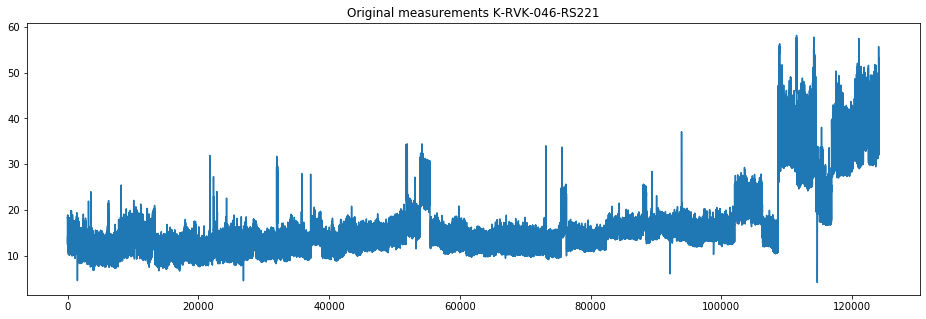

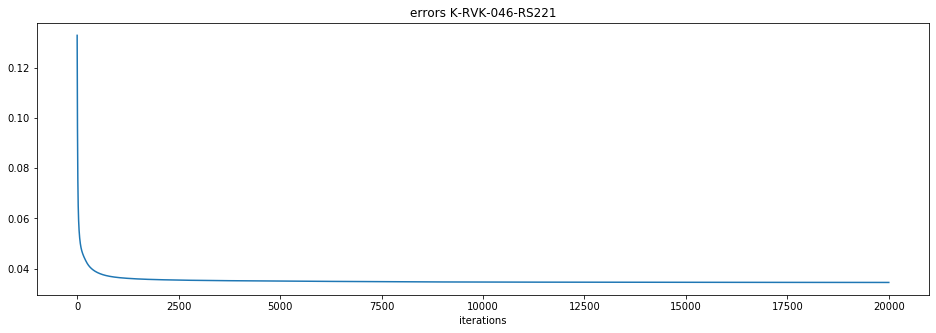

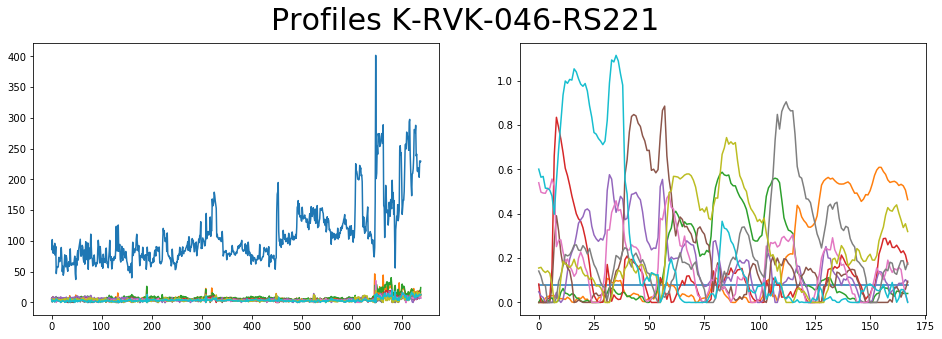

mean squared error 0.42437276754680053
abundance of each profile: [3299.59921992  908.70564267  855.10158846  458.54385048  483.62374125
  517.70004782  399.41080264  499.07211278  563.37612684  717.65764587]
Leak persentage: 37.91%


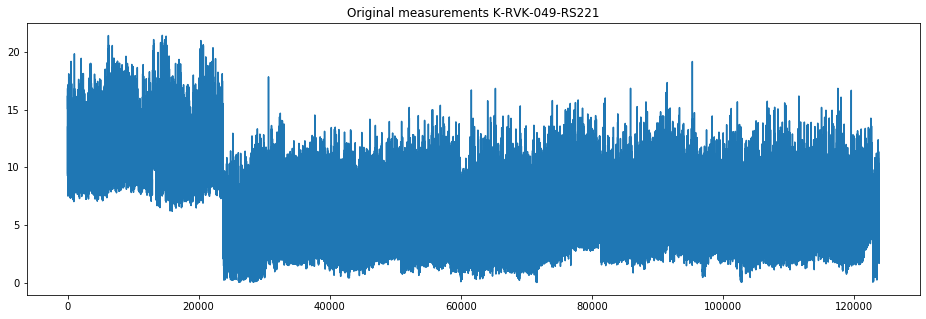

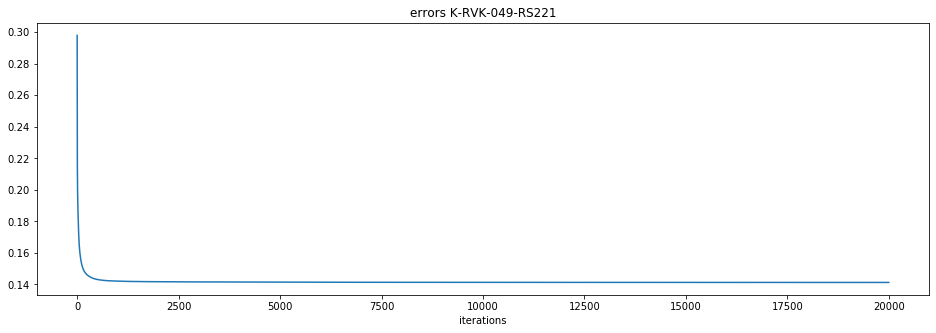

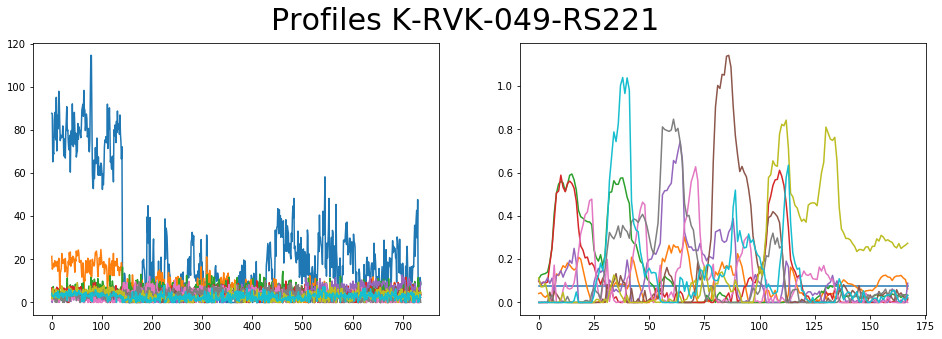

mean squared error 1.1116795516446363
abundance of each profile: [1017.65492299  364.34564063  478.88250503  326.76393023  340.89438126
  448.64115163  251.44395975  341.70147534  381.8293565   282.73199964]
Leak persentage: 24.03%


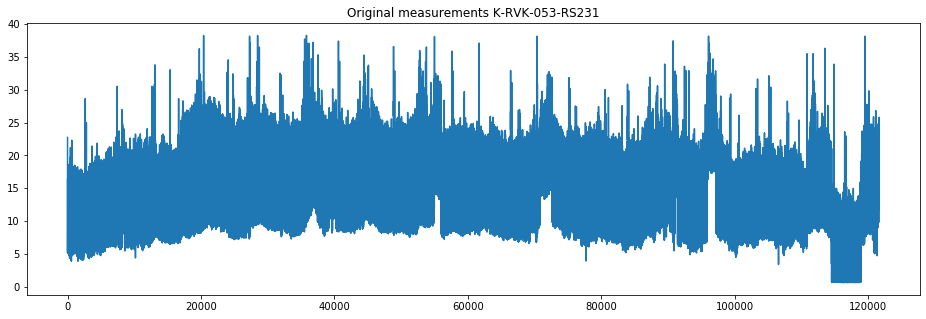

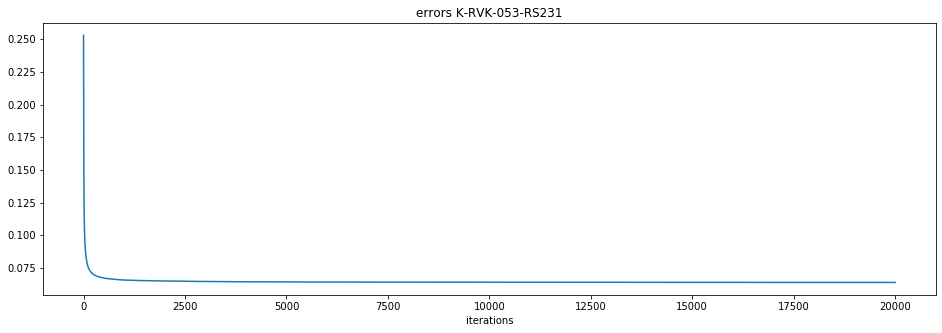

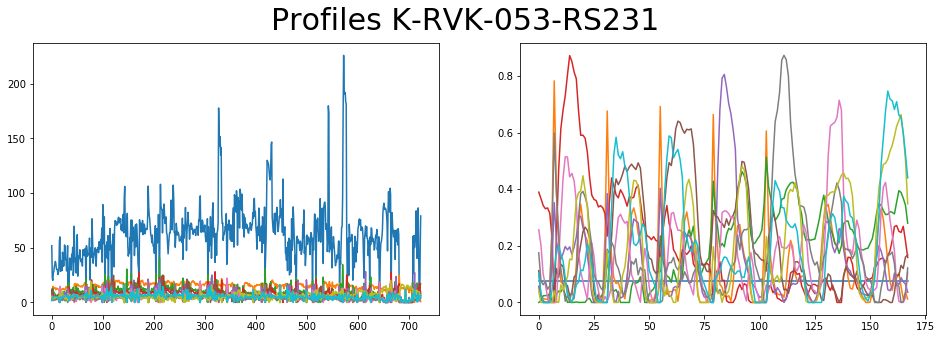

mean squared error 1.115809428993688
abundance of each profile: [1803.48132117  917.44333018  889.11139363  892.99867628  517.29484373
  591.33284821  435.38233092  422.58764649  658.2246535   599.43915851]
Leak persentage: 23.34%


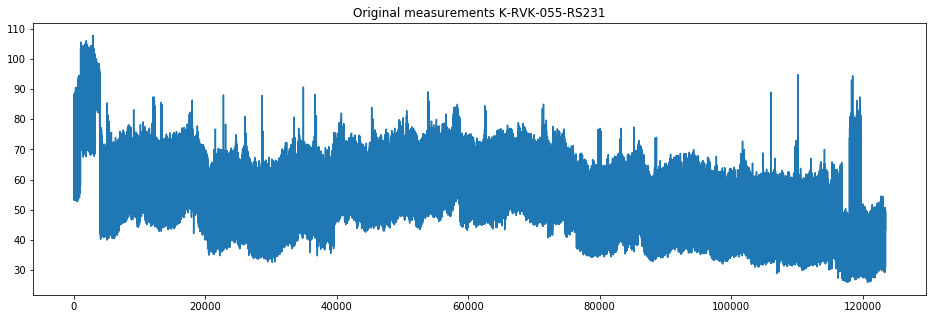

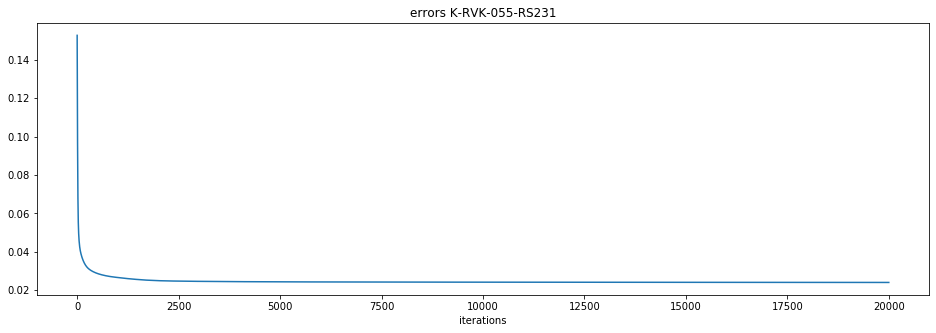

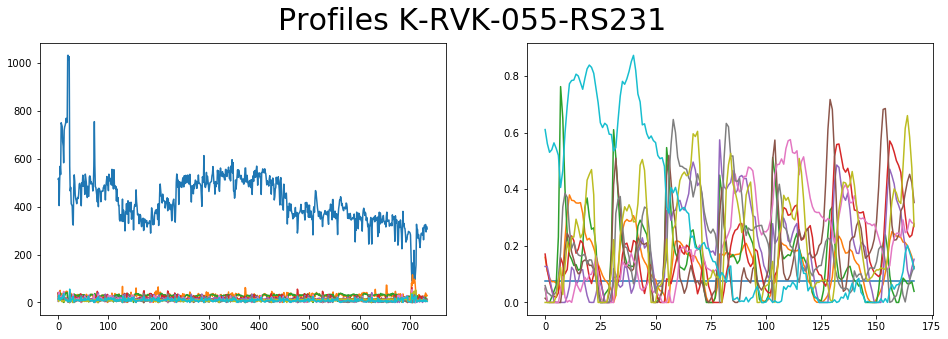

mean squared error 2.019246790323229
abundance of each profile: [11909.86958944  1722.82551073  1946.9861644   1463.20001223
  1369.85136373  1118.66022181  1252.15333546   928.1557814
  1139.68544528  1563.66065995]
Leak persentage: 48.78%


In [12]:
key_list = [x for x in clean_sensor_dict]

for key in key_list:
    tmp_X = clean_sensor_dict[key]
    complete_weeks = ~np.isnan(tmp_X).reshape(-1,24*7).any(axis=1)
    X = tmp_X[complete_weeks,:]
    flat_factors = [(1,0),(2,0)]
    ####
    
    plt.figure(figsize=(16,5))
    plt.plot(X.ravel())
    plt.title(f'Original measurements {key}')
    plt.show()
    
    ####
    
    (core_tesnor,loadings),errors = non_negative_parafac_custom(X.reshape(-1,24*7),
                                                            rank=10,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = [(1,0)],
                                                    normalize_factors=False)
    l_weeks,l_weekhours = loadings
    
    ####
    
    
    plt.figure(figsize=(16,5))
    plt.plot(errors)
    plt.title(f'errors {key}')
    plt.xlabel('iterations')
    plt.show()
    
    ###
    new_weights,normalized_loadings = kruskal_normalise((np.ones(10),
                                                         loadings))
    
    l_weeks,l_weekhours = loadings
    f,ax = plt.subplots(1,2,figsize=(16,5))
    ax[0].plot(l_weeks)
    ax[1].plot(l_weekhours)
    plt.suptitle(f'Profiles {key}',fontsize=(30))
    plt.show()
    
    ###
    
    reconstructed = khatri_rao(loadings)
    residuals = khatri_rao(loadings).sum(axis=1)-X.ravel()
    print('mean squared error',np.mean(residuals**2))
    print('abundance of each profile:',new_weights)
    print(f'Leak persentage: {np.round(100*new_weights[0]/np.sum(new_weights),2)}%')